<a href="https://colab.research.google.com/github/hnhaa/Loan-Default-Analysis-and-Prediction/blob/main/%5Bfinal%5D_fda_a3_24714976.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Data Analytics
Nhat Ha Huynh - 24714976

Assessment Task 3

# Load Dataset

In [ ]:
# Import data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

df = pd.read_csv('/content/drive/My Drive/FDA ꒰ᐢ. .ᐢ꒱₊˚⊹/Python files/Prediction Model/loan_data_training.csv')

# Understand Dataset

In [ ]:
df.shape

(42452, 72)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42452 entries, 0 to 42451
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   42452 non-null  int64  
 1   TARGET                       42452 non-null  int64  
 2   NAME_CONTRACT_TYPE           42452 non-null  object 
 3   CODE_GENDER                  42452 non-null  object 
 4   FLAG_OWN_CAR                 42452 non-null  object 
 5   FLAG_OWN_REALTY              42452 non-null  object 
 6   CNT_CHILDREN                 42452 non-null  int64  
 7   AMT_INCOME_TOTAL             42452 non-null  float64
 8   AMT_CREDIT                   42452 non-null  float64
 9   AMT_ANNUITY                  42451 non-null  float64
 10  AMT_GOODS_PRICE              42404 non-null  float64
 11  NAME_TYPE_SUITE              42293 non-null  object 
 12  NAME_INCOME_TYPE             42452 non-null  object 
 13  NAME_EDUCATION_T

# Drop columns that do not contribute to the prediction task

Based on the previous EDA, these attributes are found not having a significant contribution to the loan default



In [ ]:
columns_to_drop = ['SK_ID_CURR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
                   'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                   'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                   'FLAG_DOCUMENT_21', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                   'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.shape

(42452, 43)

# Change negative values to positive values

In [ ]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].abs()
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].abs()
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].abs()

# Change attribute types

In [ ]:
df['TARGET'] = df['TARGET'].astype('object')
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].astype('int64')
df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype('object')
df['REGION_RATING_CLIENT_W_CITY'] = df['REGION_RATING_CLIENT_W_CITY'].astype('object')
df['REG_REGION_NOT_LIVE_REGION'] = df['REG_REGION_NOT_LIVE_REGION'].astype('object')
df['REG_REGION_NOT_WORK_REGION'] = df['REG_REGION_NOT_WORK_REGION'].astype('object')
df['LIVE_REGION_NOT_WORK_REGION'] = df['LIVE_REGION_NOT_WORK_REGION'].astype('object')
df['REG_CITY_NOT_LIVE_CITY'] = df['REG_CITY_NOT_LIVE_CITY'].astype('object')
df['REG_CITY_NOT_WORK_CITY'] = df['REG_CITY_NOT_WORK_CITY'].astype('object')
df['LIVE_CITY_NOT_WORK_CITY'] = df['LIVE_CITY_NOT_WORK_CITY'].astype('object')

# Missing Values

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({ 'Counts':df.isnull().sum(), 'Missing Percentage': missing_percentage.values})

missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
# Display the DataFrame
(missing_info)

,Counts,Missing Percentage
EXT_SOURCE_3,8966,21.120324
AMT_REQ_CREDIT_BUREAU_YEAR,6431,15.148874
AMT_REQ_CREDIT_BUREAU_QRT,6431,15.148874
AMT_REQ_CREDIT_BUREAU_MON,6431,15.148874
AMT_REQ_CREDIT_BUREAU_WEEK,6431,15.148874
AMT_REQ_CREDIT_BUREAU_DAY,6431,15.148874
AMT_REQ_CREDIT_BUREAU_HOUR,6431,15.148874
NAME_TYPE_SUITE,159,0.374541
OBS_60_CNT_SOCIAL_CIRCLE,105,0.247338
OBS_30_CNT_SOCIAL_CIRCLE,105,0.247338


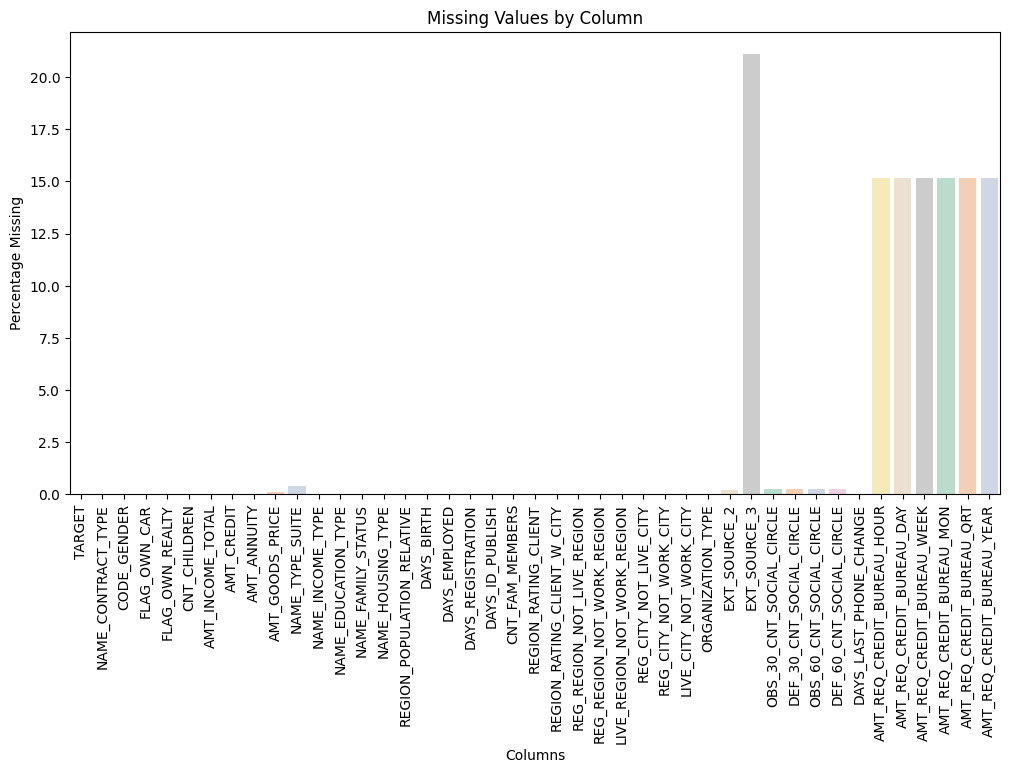

In [ ]:
# Create a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage, palette = 'Pastel2')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.title('Missing Values by Column')
plt.show()

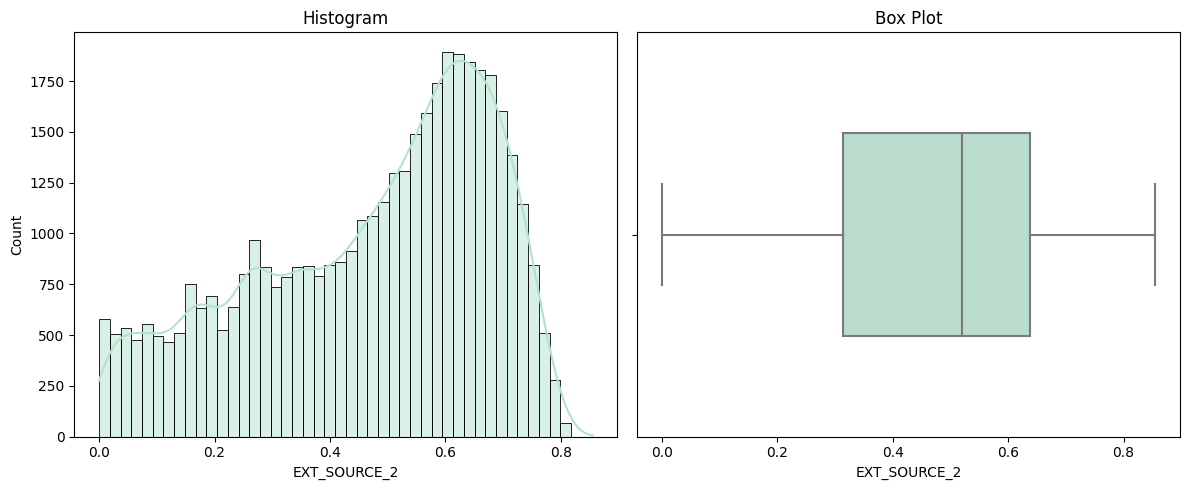

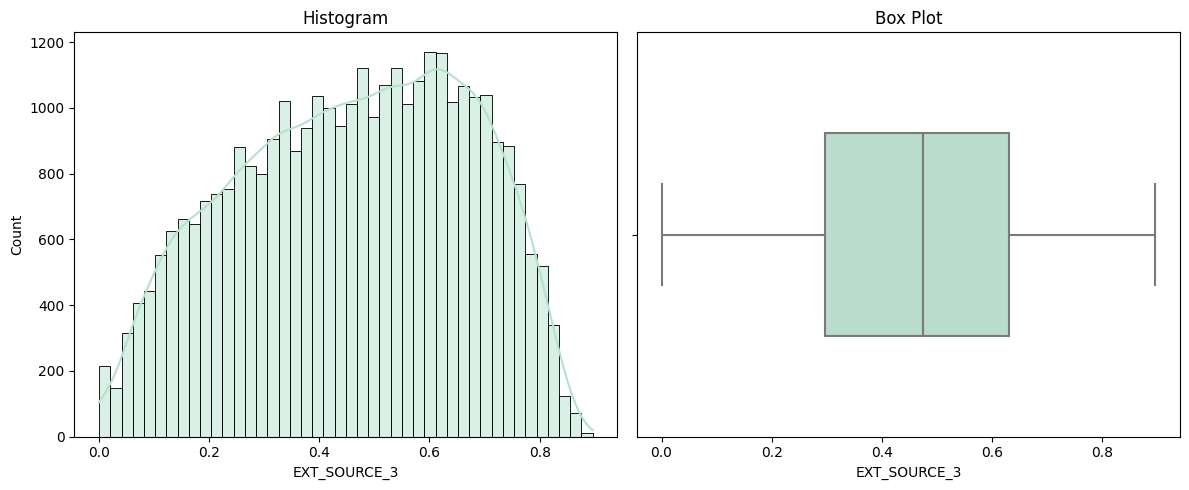

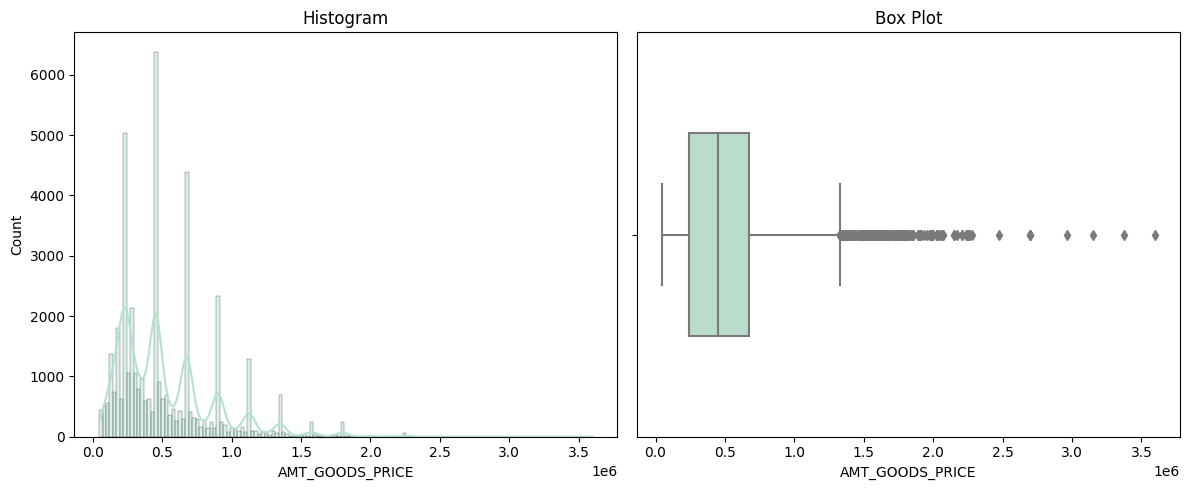

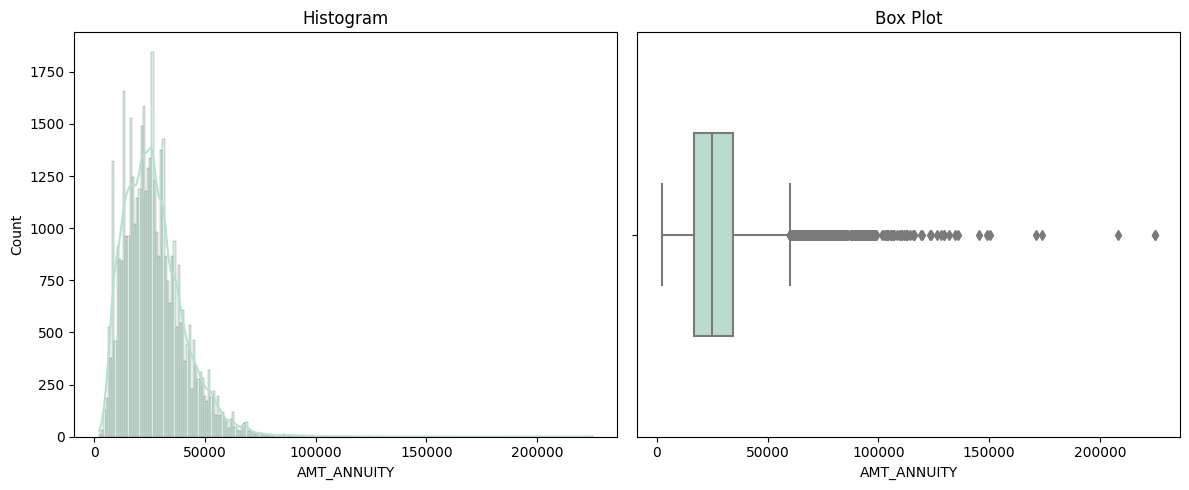

In [ ]:
fillna_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']

sns.set_palette('Pastel2')

for col in fillna_cols:
# Create a histogram
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True)
  plt.title('Histogram')

# Create a box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(data=df, x=col, width=0.5)
  plt.title('Box Plot')

  plt.tight_layout()
  plt.show()

In [ ]:
from sklearn.impute import KNNImputer

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df[fillna_cols] = knn_imputer.fit_transform(df[fillna_cols])

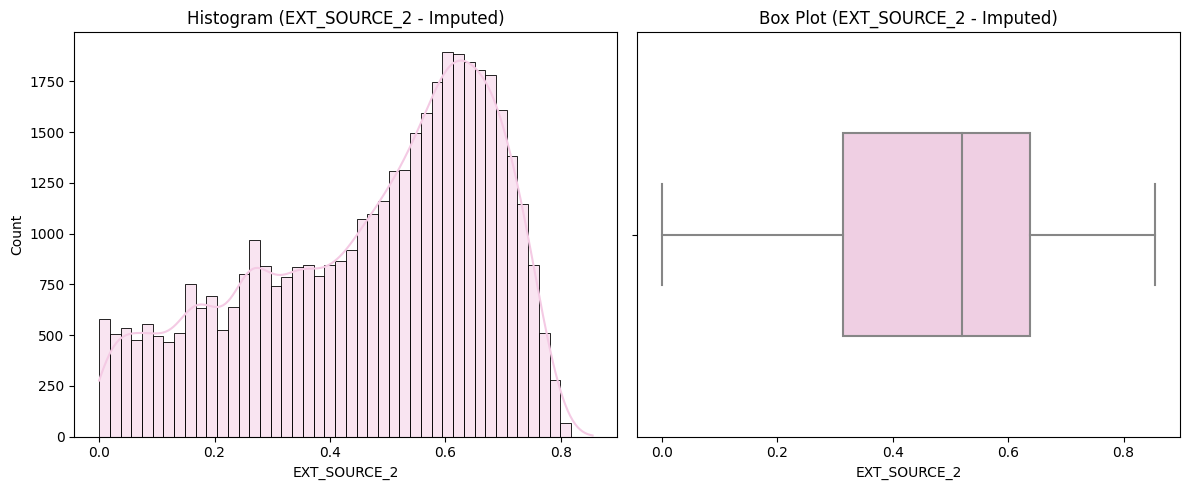

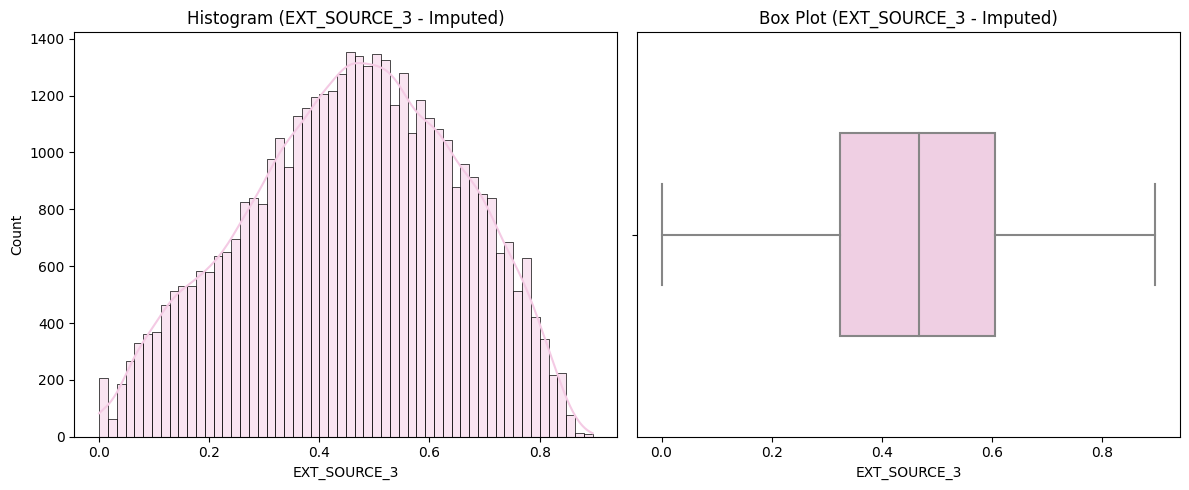

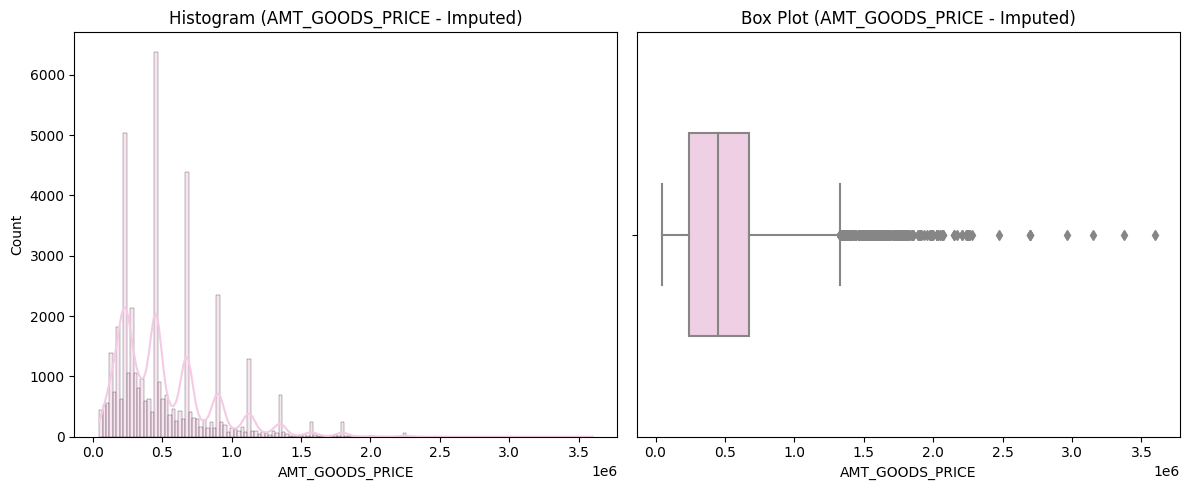

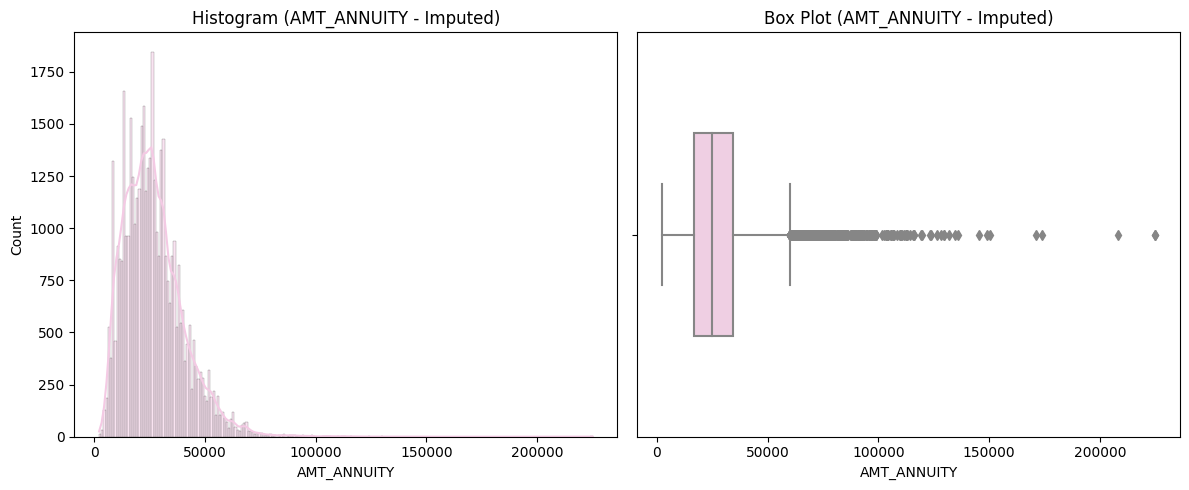

In [ ]:
# Set the 'pastel2' color palette
colors = sns.color_palette("Pastel2")

for col in fillna_cols:
    # Create a histogram of the specified column
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color=colors[3])  # Set the color for the histogram
    plt.title(f'Histogram ({col} - Imputed)')

    # Create a box plot of the specified column
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, width=0.5, color=colors[3])  # Set the color for the box plot
    plt.title(f'Box Plot ({col} - Imputed)')

    plt.tight_layout()
    plt.show()


In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with missing values (e.g., above 0%)
missing_info = missing_percentage[missing_percentage > 0]

# Display the DataFrame
print(missing_info)


NAME_TYPE_SUITE                0.374541
CNT_FAM_MEMBERS                0.002356
OBS_30_CNT_SOCIAL_CIRCLE       0.247338
DEF_30_CNT_SOCIAL_CIRCLE       0.247338
OBS_60_CNT_SOCIAL_CIRCLE       0.247338
DEF_60_CNT_SOCIAL_CIRCLE       0.247338
AMT_REQ_CREDIT_BUREAU_HOUR    15.148874
AMT_REQ_CREDIT_BUREAU_DAY     15.148874
AMT_REQ_CREDIT_BUREAU_WEEK    15.148874
AMT_REQ_CREDIT_BUREAU_MON     15.148874
AMT_REQ_CREDIT_BUREAU_QRT     15.148874
AMT_REQ_CREDIT_BUREAU_YEAR    15.148874
dtype: float64


We impute the rest of the attributes with missing values.

In [ ]:
df['NAME_TYPE_SUITE'].fillna('Others', inplace = True)
df['CNT_FAM_MEMBERS'].fillna(0, inplace = True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace = True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace = True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace = True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace = True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace = True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE

# Feature Engineering

## DAYS_LAST_PHONE_CHANGE

In [ ]:
# Convert days to years
df['YEARS_LAST_PHONE_CHANGE'] = (df['DAYS_LAST_PHONE_CHANGE'] / 365).round()

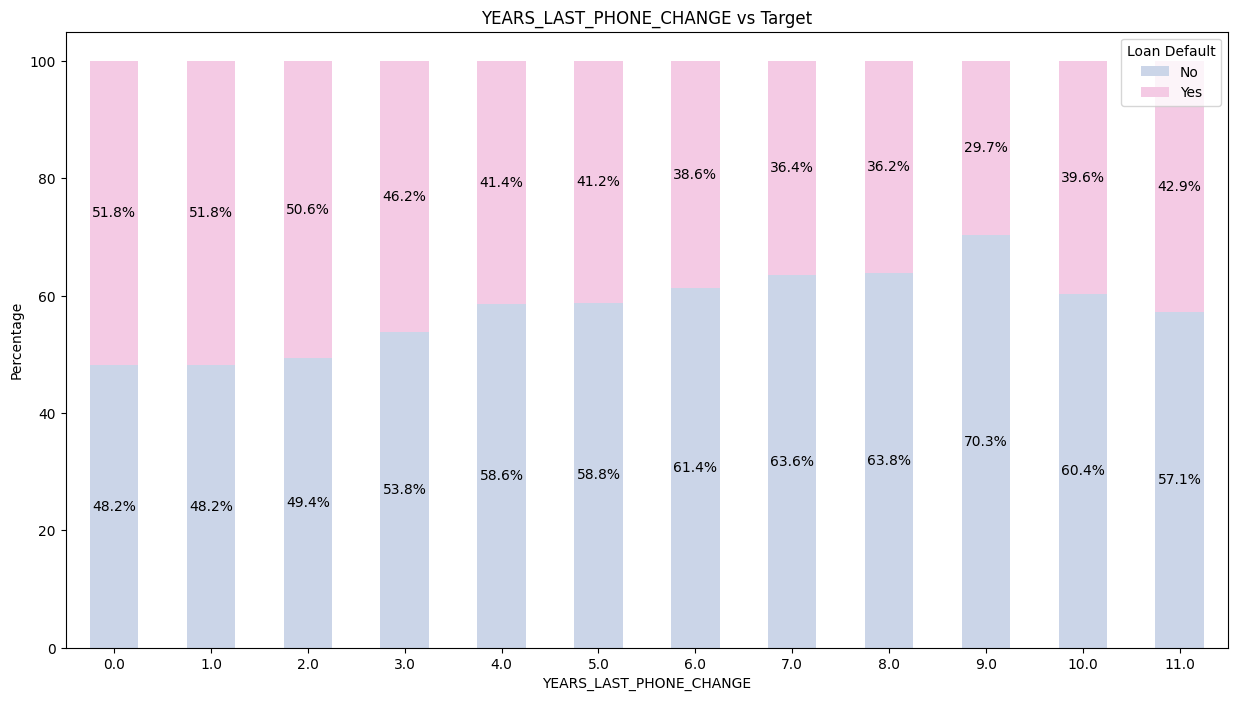

In [ ]:
colors = sns.color_palette("Pastel2")

grouped_data = df.groupby(['YEARS_LAST_PHONE_CHANGE', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('YEARS_LAST_PHONE_CHANGE')
ax.set_ylabel('Percentage')
ax.set_title('YEARS_LAST_PHONE_CHANGE vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()


In [ ]:
threshold = 3

# Create a new column 'RECENT_PHONE_CHANGE'
df['RECENT_PHONE_CHANGE'] = (df['YEARS_LAST_PHONE_CHANGE'] < threshold).astype(int)

# Display the distribution of 'RECENT_PHONE_CHANGE'
binary_counts = df['RECENT_PHONE_CHANGE'].value_counts()
print(binary_counts)

1    25220
0    17232
Name: RECENT_PHONE_CHANGE, dtype: int64


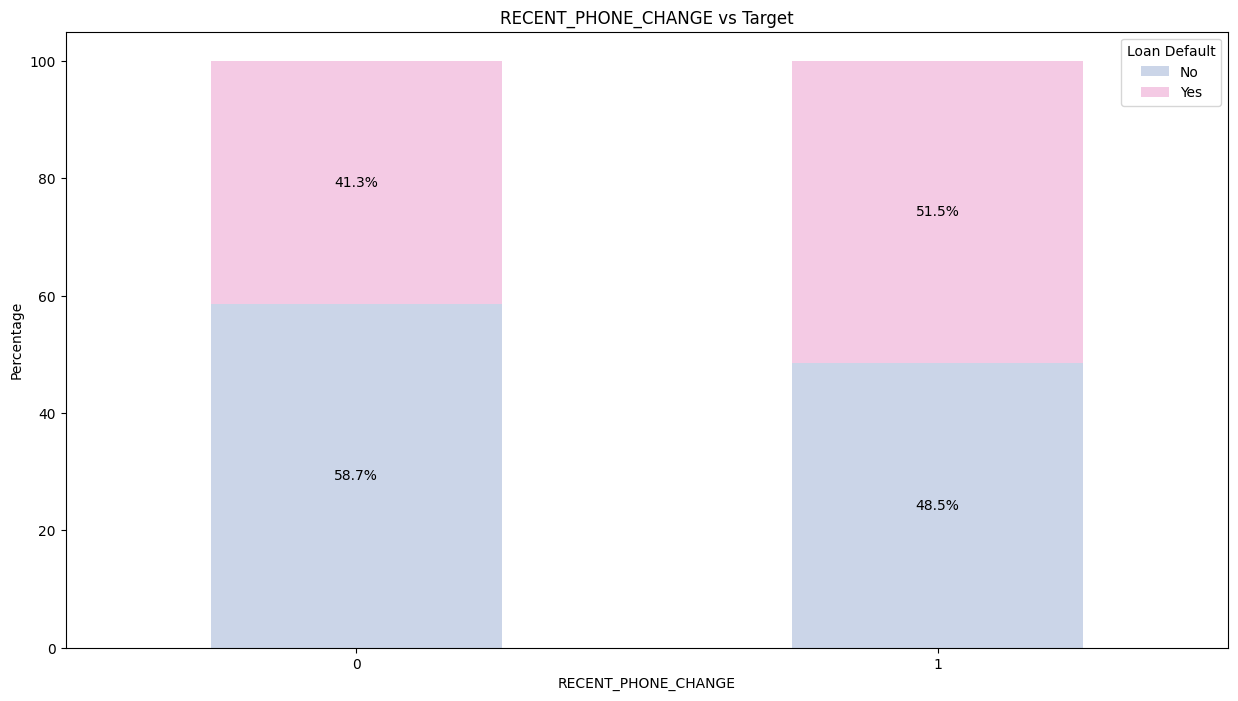

In [ ]:
colors = sns.color_palette("Pastel2")

grouped_data = df.groupby(['RECENT_PHONE_CHANGE', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('RECENT_PHONE_CHANGE')
ax.set_ylabel('Percentage')
ax.set_title('RECENT_PHONE_CHANGE vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()


In [ ]:
df = df.drop(columns = ['DAYS_LAST_PHONE_CHANGE','YEARS_LAST_PHONE_CHANGE'])

## DAYS_ID_PUBLISH

In [ ]:
# Convert days to years
df['YEARS_ID_PUBLISH'] = (df['DAYS_ID_PUBLISH'] / 365).round()

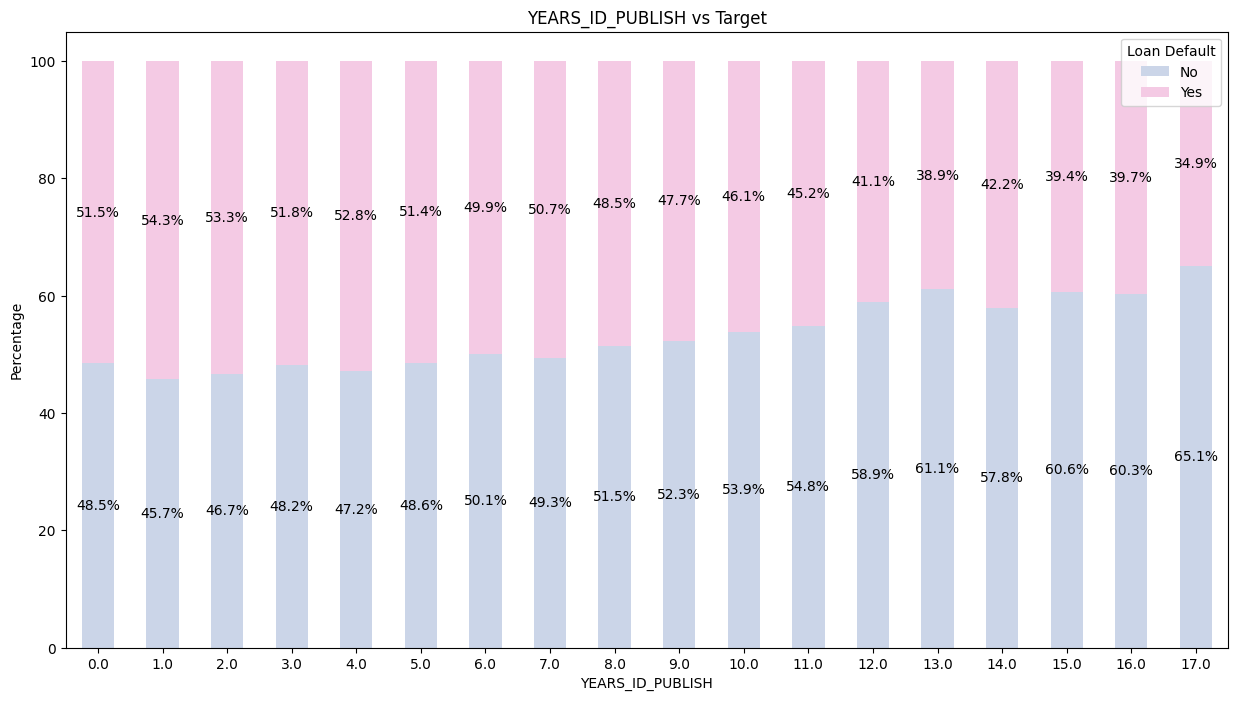

In [ ]:
grouped_data = df.groupby(['YEARS_ID_PUBLISH', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('YEARS_ID_PUBLISH')
ax.set_ylabel('Percentage')
ax.set_title('YEARS_ID_PUBLISH vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()
grouped_data = df.groupby(['YEARS_ID_PUBLISH', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

In [ ]:
# Define the category thresholds
recent_threshold = 6
intermediate_threshold = 12

# Create a new column 'YEARS_ID_PUBLISH_CATEGORY' based on the thresholds
df['YEARS_ID_PUBLISH'] = pd.cut(df['YEARS_ID_PUBLISH'],
    bins=[-1, recent_threshold, intermediate_threshold, float('inf')],
    labels=['Recent Changes (0-6 years)', 'Intermediate Changes (7-12 years)', 'Long-Term Changes (13+ years)'],
    right=False  # Define if the intervals are left-inclusive
)

# Display the distribution of 'YEARS_ID_PUBLISH_CATEGORY'
category_counts = df['YEARS_ID_PUBLISH'].value_counts()
print(category_counts)


Intermediate Changes (7-12 years)    17664
Recent Changes (0-6 years)           13697
Long-Term Changes (13+ years)        11091
Name: YEARS_ID_PUBLISH, dtype: int64


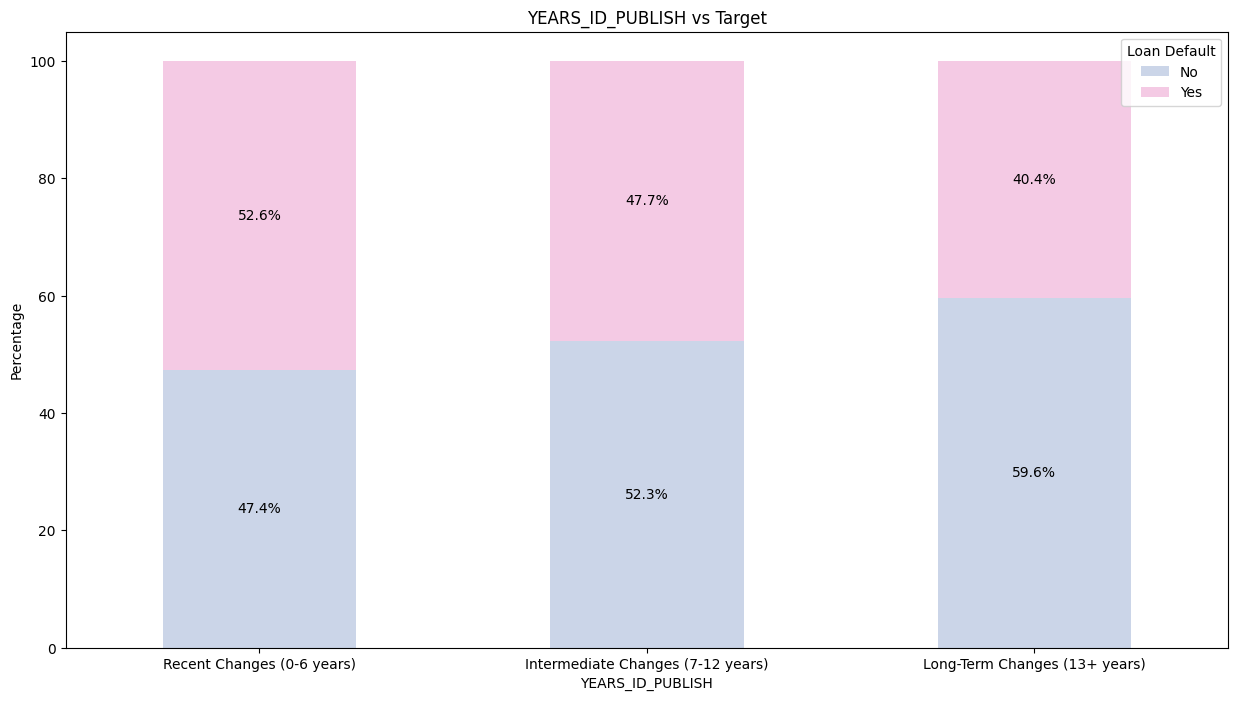

In [ ]:
grouped_data = df.groupby(['YEARS_ID_PUBLISH', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('YEARS_ID_PUBLISH')
ax.set_ylabel('Percentage')
ax.set_title('YEARS_ID_PUBLISH vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()

In [ ]:
df = df.drop(columns = 'DAYS_ID_PUBLISH')

## DAYS_REGISTRATION

In [ ]:
df['YEARS_REGISTRATION'] = (df['DAYS_REGISTRATION']/365).round()

In [ ]:
df['YEARS_REGISTRATION'].describe()

count    42452.000000
mean        13.056935
std          9.452110
min          0.000000
25%          5.000000
50%         12.000000
75%         19.000000
max         56.000000
Name: YEARS_REGISTRATION, dtype: float64

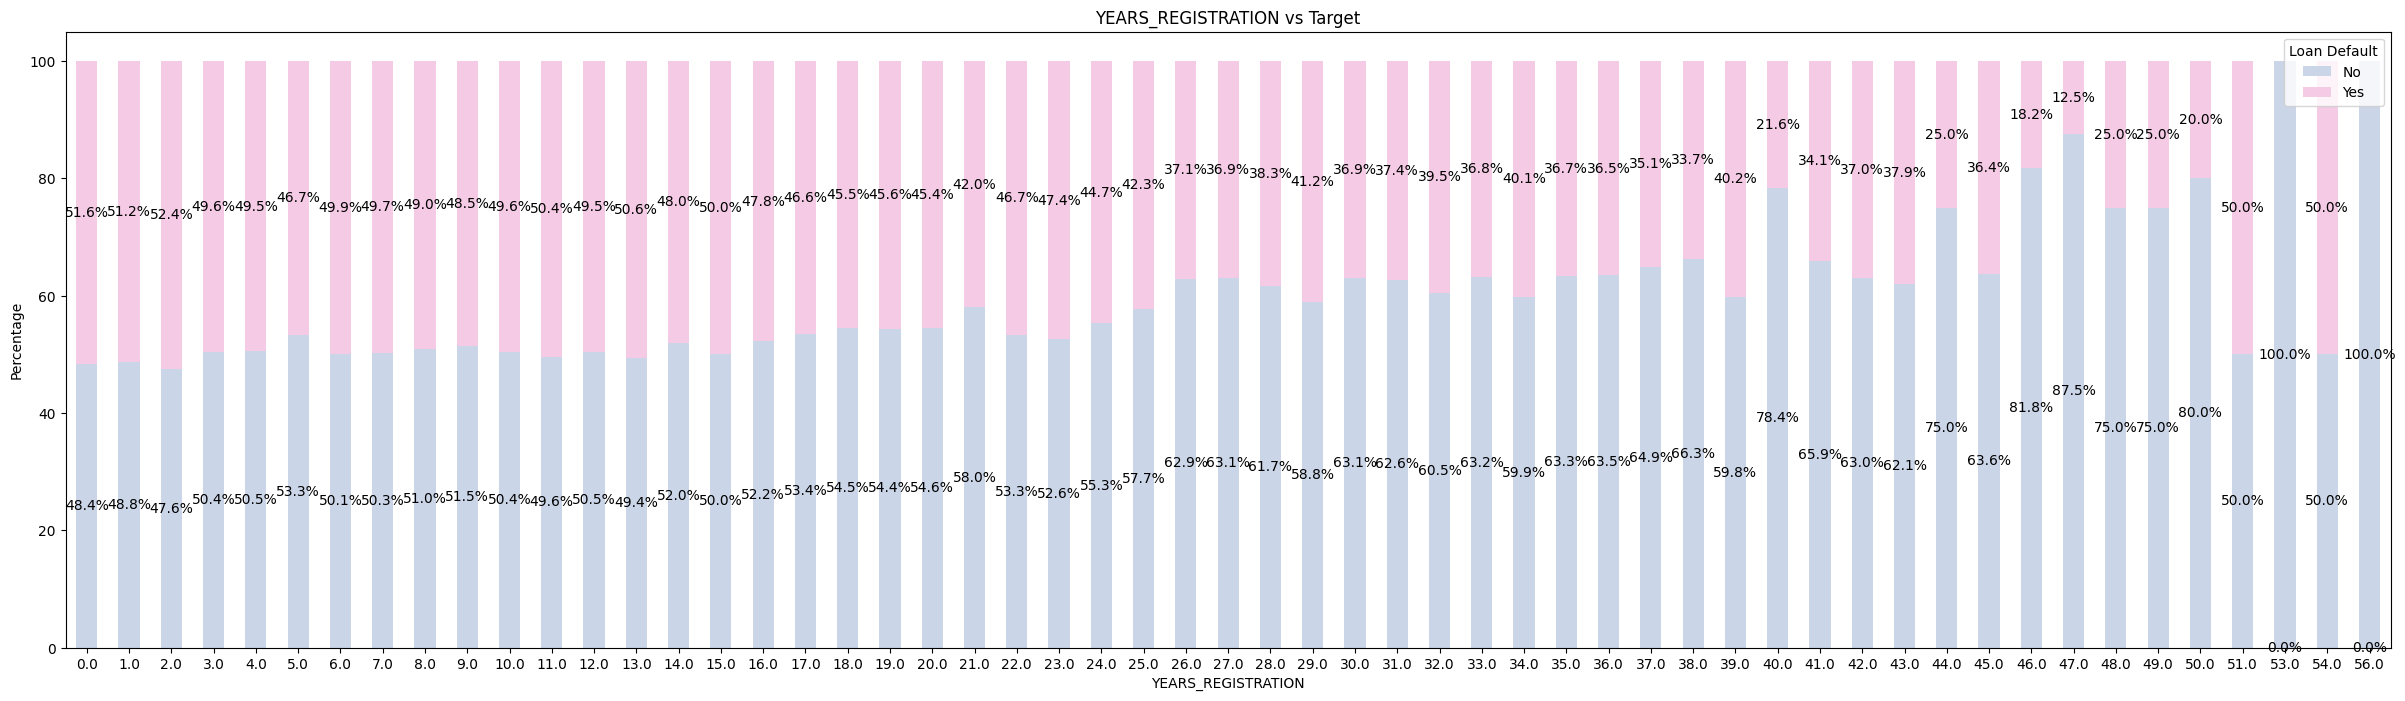

In [ ]:
grouped_data = df.groupby(['YEARS_REGISTRATION', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(30, 8), color=colors[2:], rot=0)
ax.set_xlabel('YEARS_REGISTRATION')
ax.set_ylabel('Percentage')
ax.set_title('YEARS_REGISTRATION vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()

In [ ]:
# Set the thresholds for categorization
recent_threshold = 8
intermediate_threshold = 25

# Create a new column 'YEARS_REGISTRATION_CATEGORY' based on the thresholds
df['YEARS_REGISTRATION'] = pd.cut(df['YEARS_REGISTRATION'],
                                           bins=[-1, recent_threshold, intermediate_threshold, df['YEARS_REGISTRATION'].max()],
                                           labels=['Recent Registration (0-8 years)', 'Intermediate Registration (9-25 years)',
                                                   'Long-Term Registration (26+ years)'],
                                           include_lowest=True)

# Display the distribution of 'YEARS_REGISTRATION_CATEGORY'
category_counts = df['YEARS_REGISTRATION'].value_counts()
print(category_counts)


Intermediate Registration (9-25 years)    21426
Recent Registration (0-8 years)           16043
Long-Term Registration (26+ years)         4983
Name: YEARS_REGISTRATION, dtype: int64


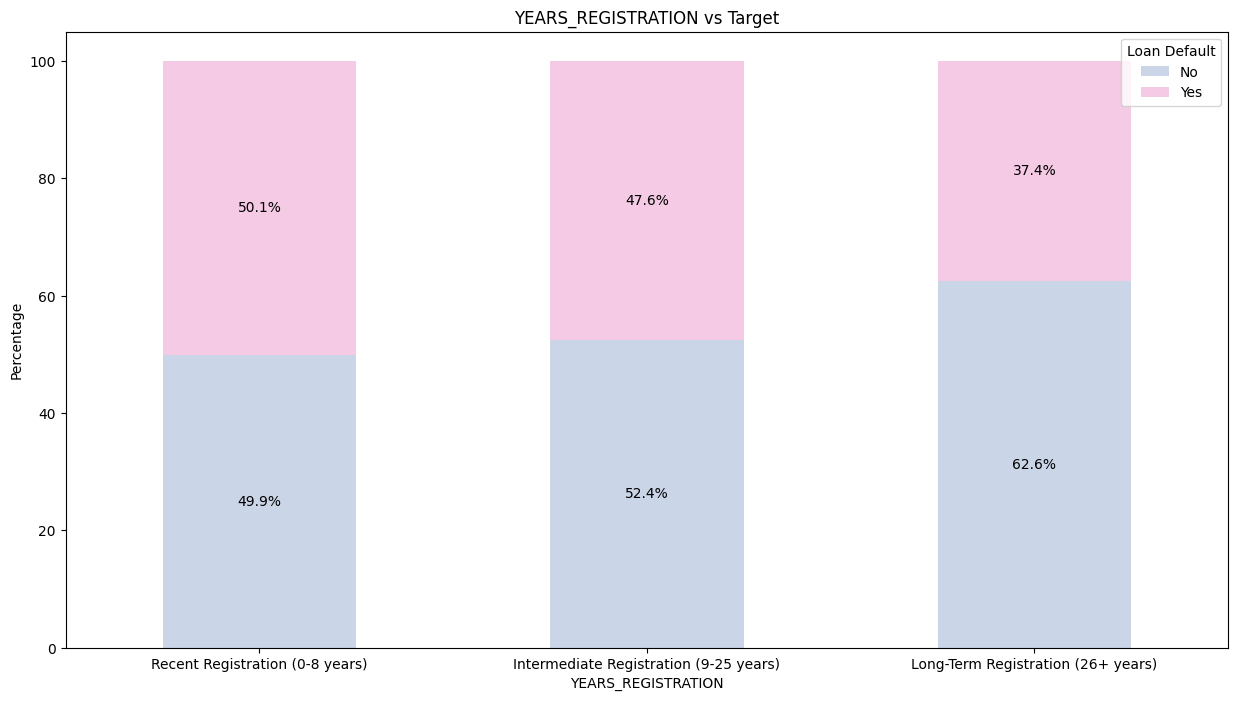

In [ ]:
grouped_data = df.groupby(['YEARS_REGISTRATION', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('YEARS_REGISTRATION')
ax.set_ylabel('Percentage')
ax.set_title('YEARS_REGISTRATION vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()

In [ ]:
df = df.drop(columns = 'DAYS_REGISTRATION')

CNT_CHIDLREN

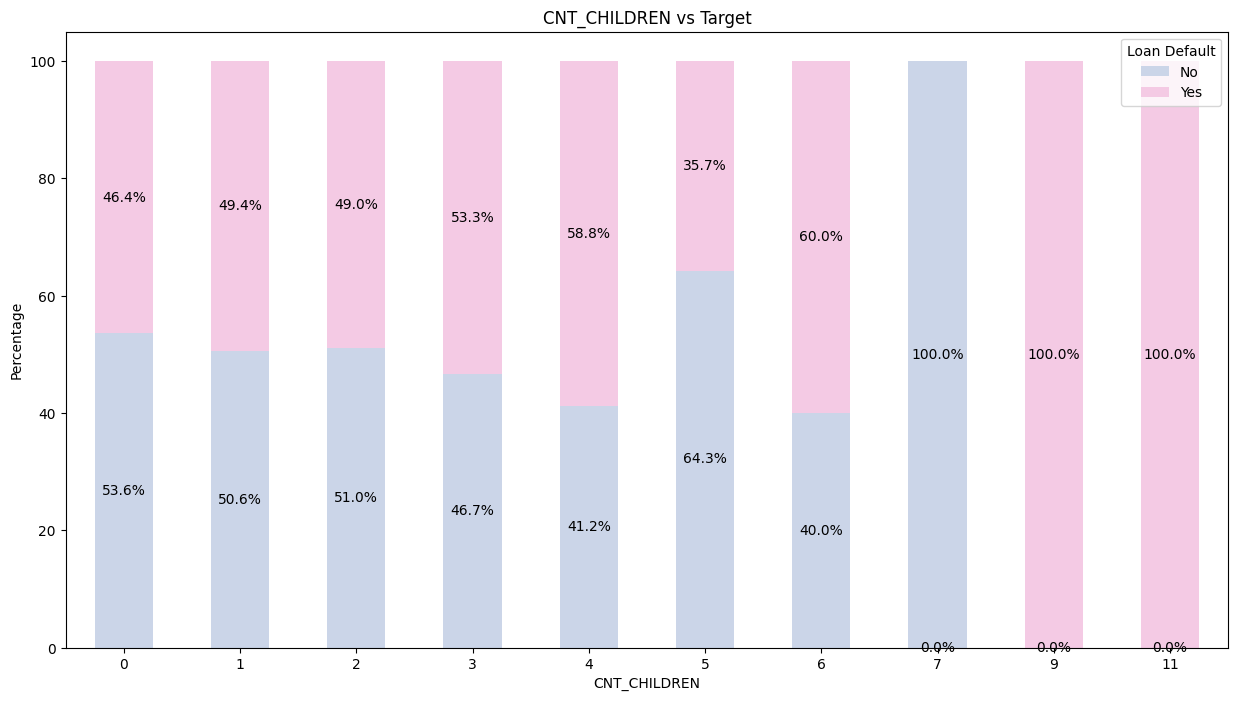

In [ ]:
grouped_data = df.groupby(['CNT_CHILDREN', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('CNT_CHILDREN')
ax.set_ylabel('Percentage')
ax.set_title('CNT_CHILDREN vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()

In [ ]:
# Create a function to categorize the number of children
def categorize_children(count):
    if count == 0:
        return 'No Children'
    elif count in (1, 2):
        return '1-2 Children'
    else:
        return 'More than 2 Children'

# Apply the function to create a new categorical column
df['CHILDREN_CATEGORY'] = df['CNT_CHILDREN'].apply(categorize_children)

# Display the distribution of the new category
child_category_counts = df['CHILDREN_CATEGORY'].value_counts()
print(child_category_counts)


No Children             29031
1-2 Children            12795
More than 2 Children      626
Name: CHILDREN_CATEGORY, dtype: int64


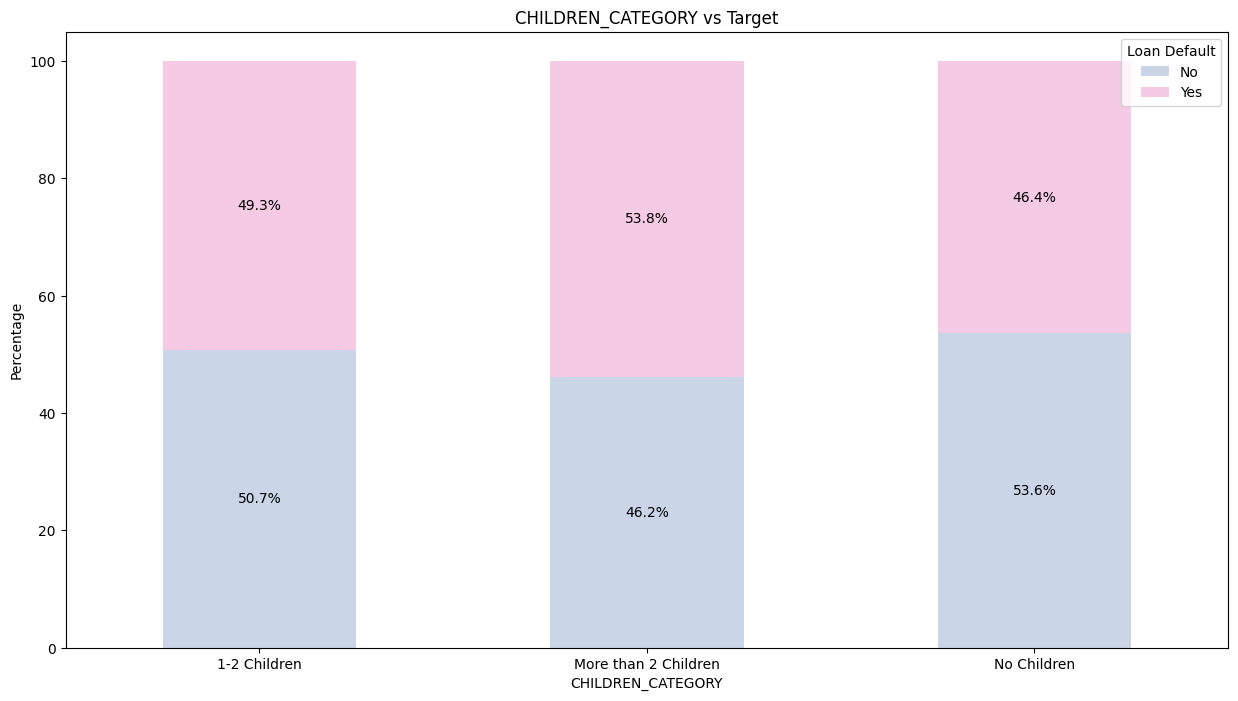

In [ ]:
grouped_data = df.groupby(['CHILDREN_CATEGORY', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('CHILDREN_CATEGORY')
ax.set_ylabel('Percentage')
ax.set_title('CHILDREN_CATEGORY vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()

In [ ]:
df = df.drop(columns = 'CNT_CHILDREN')

## DAYS_BIRTH

In [ ]:
# Define the category bins and labels
birth_bins = [0, 10000, 20000, 30000]
birth_labels = ['Children and Young adults', 'Adults', 'Elderlies']

# Discretize the 'DAYS_BIRTH' column into categories
df['AGE_GROUP'] = pd.cut(df['DAYS_BIRTH'], bins=birth_bins, labels=birth_labels)

# Calculate the frequency of each category
category_counts = df['AGE_GROUP'].value_counts()

# Display the frequency of each category
print(category_counts)


Adults                       30262
Elderlies                     8273
Children and Young adults     3917
Name: AGE_GROUP, dtype: int64


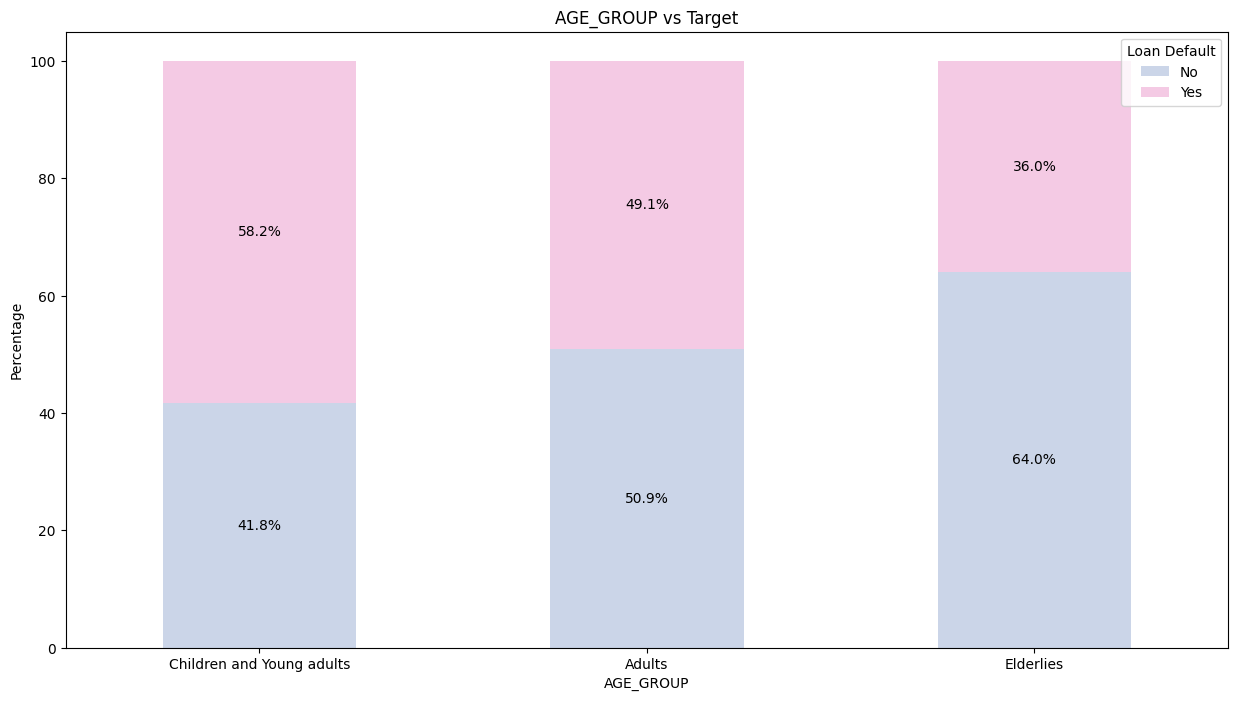

In [ ]:
grouped_data = df.groupby(['AGE_GROUP', 'TARGET']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors[2:], rot=0)
ax.set_xlabel('AGE_GROUP')
ax.set_ylabel('Percentage')
ax.set_title('AGE_GROUP vs Target')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

labels = ['No', 'Yes']
ax.legend(labels=labels, title='Loan Default', loc='upper right')

plt.show()

In [ ]:
df = df.drop(columns = 'DAYS_BIRTH')

## NAME_INCOME_TYPE

In [ ]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 23715
Commercial associate     9447
Pensioner                6616
State servant            2658
Unemployed                 10
Student                     4
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
non_working_categories = ['Unemployed', 'Pensioner']

# Use the 'replace' method to replace these categories with 'Retired'
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace(non_working_categories, 'Retired')

## NAME_TYPE_SUITE

In [ ]:
others = ['Other_A', 'Other_B']

df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(others, 'Others')

## ORGANIZATION_TYPE

In [ ]:
df['ORGANIZATION_TYPE'].replace({"Business Entity Type 3": "Business Entity",
                                 "Business Entity Type 2": "Business Entity",
                                 "Business Entity Type 1": "Business Entity",
                                 "Trade: type 7": "Trade",
                                 "Trade: type 6": "Trade",
                                 "Trade: type 5": "Trade",
                                 "Trade: type 4": "Trade",
                                 "Trade: type 3": "Trade",
                                 "Trade: type 2": "Trade",
                                 "Trade: type 1": "Trade",
                                 "Transport: type 4": "Transport",
                                 "Transport: type 3": "Transport",
                                 "Transport: type 2": "Transport",
                                 "Transport: type 1": "Transport",
                                 "Industry: type 1": "Industry",
                                 "Industry: type 2": "Industry",
                                 "Industry: type 3": "Industry",
                                 "Industry: type 4": "Industry",
                                 "Industry: type 5": "Industry",
                                 "Industry: type 6": "Industry",
                                 "Industry: type 7": "Industry",
                                 "Industry: type 8": "Industry",
                                 "Industry: type 9": "Industry",
                                 "Industry: type 10": "Industry",
                                 "Industry: type 11": "Industry",
                                 "Industry: type 12": "Industry",
                                 "Industry: type 13": "Industry"}, inplace=True)

In [ ]:
threshold = 0.01 * len(df)

# Count the occurrences of each value in 'ORGANIZATION_TYPE'
value_counts = df['ORGANIZATION_TYPE'].value_counts()

# Identify values that occur less than the threshold
values_to_group = value_counts[value_counts < threshold].index

# Replace values to be grouped with 'Others'
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace(values_to_group, 'Other')

In [ ]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity    12312
XNA                 6625
Self-employed       5856
Other               5818
Trade               2065
Industry            2015
Medicine            1432
Government          1385
Transport           1359
Construction        1104
School              1084
Kindergarten         902
Security             495
Name: ORGANIZATION_TYPE, dtype: int64

# Attribute Aggregation

In [ ]:
# List of columns to sum
columns_to_sum = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Create a new column 'AMT_REQ_CREDIT' by summing the values in the specified columns
df['AMT_REQ_CREDIT'] = df[columns_to_sum].sum(axis=1)

In [ ]:
df['AMT_REQ_CREDIT'].describe()

count    42452.000000
mean         2.134552
std          2.253825
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         22.000000
Name: AMT_REQ_CREDIT, dtype: float64

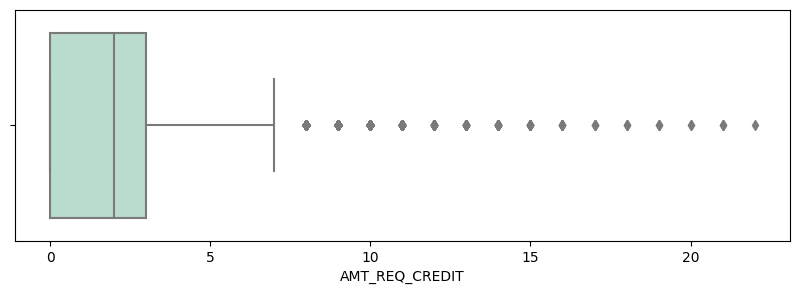

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(x=df['AMT_REQ_CREDIT'], palette = colors)
plt.show()

In [ ]:
df = df.drop(columns = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis =1)

# Visualise categorical attributes vs Target

In [ ]:
df['RECENT_PHONE_CHANGE'] = df['RECENT_PHONE_CHANGE'].astype('object')
df['YEARS_ID_PUBLISH'] = df['YEARS_ID_PUBLISH'].astype('object')
df['YEARS_REGISTRATION'] = df['YEARS_REGISTRATION'].astype('object')
df['AGE_GROUP'] = df['AGE_GROUP'].astype('object')

In [ ]:
categorical_columns = df.select_dtypes(include=['object'])

In [ ]:
colors = ['#FFB6C1', '#D8BFD8']

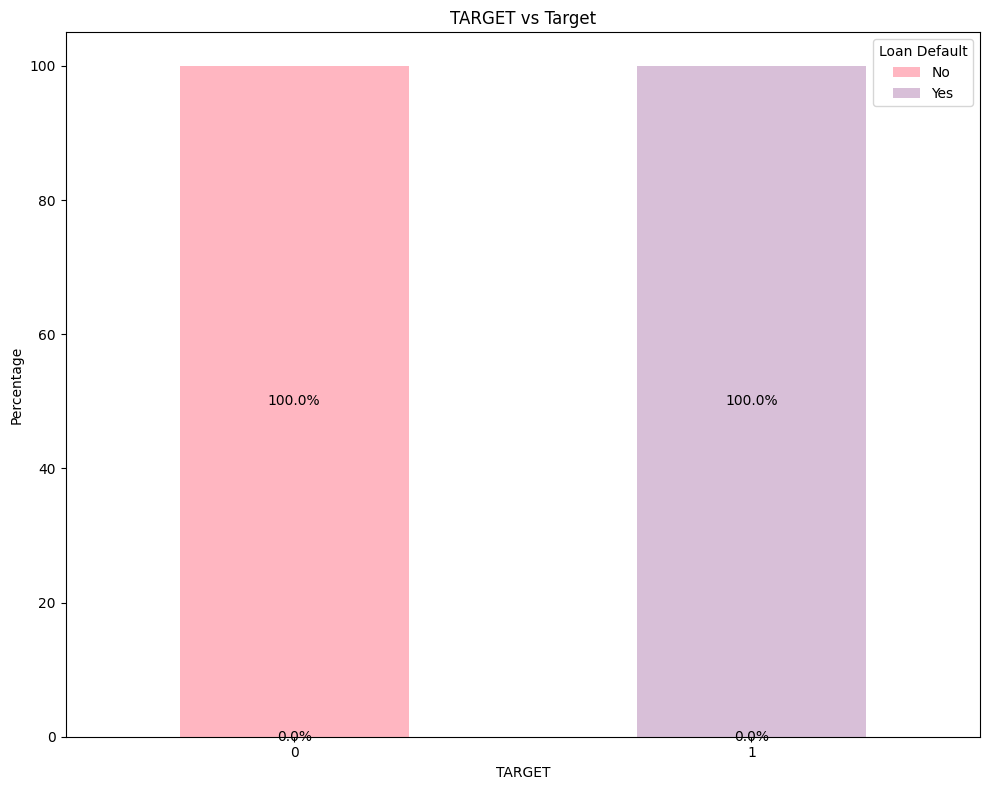

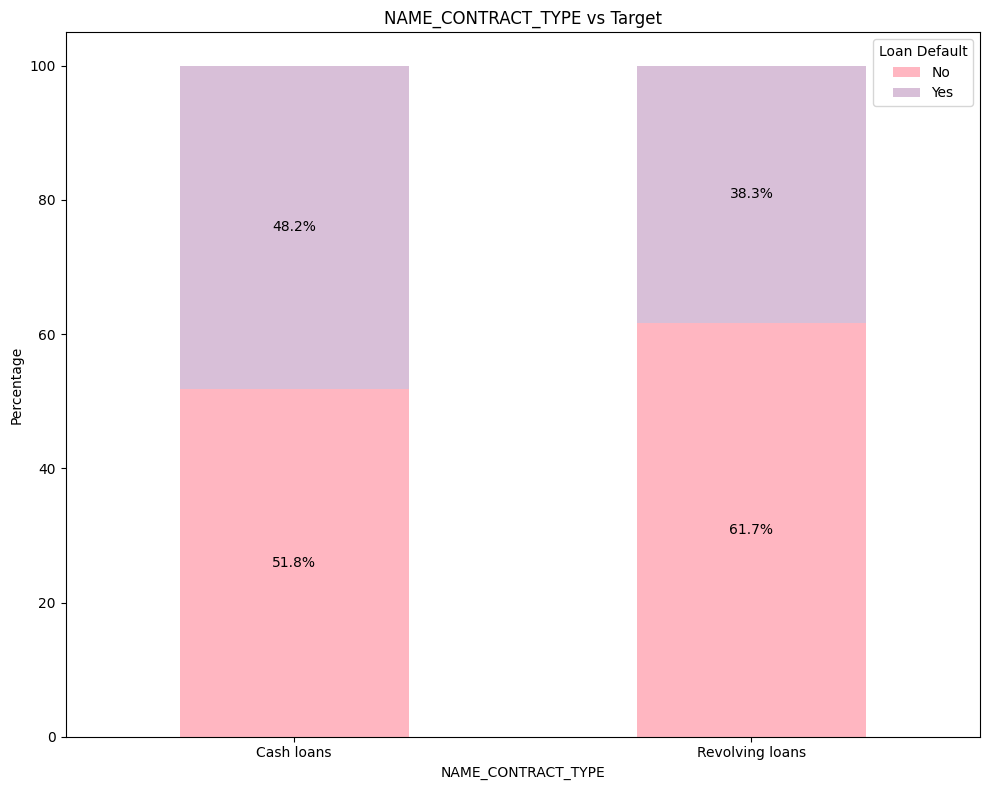

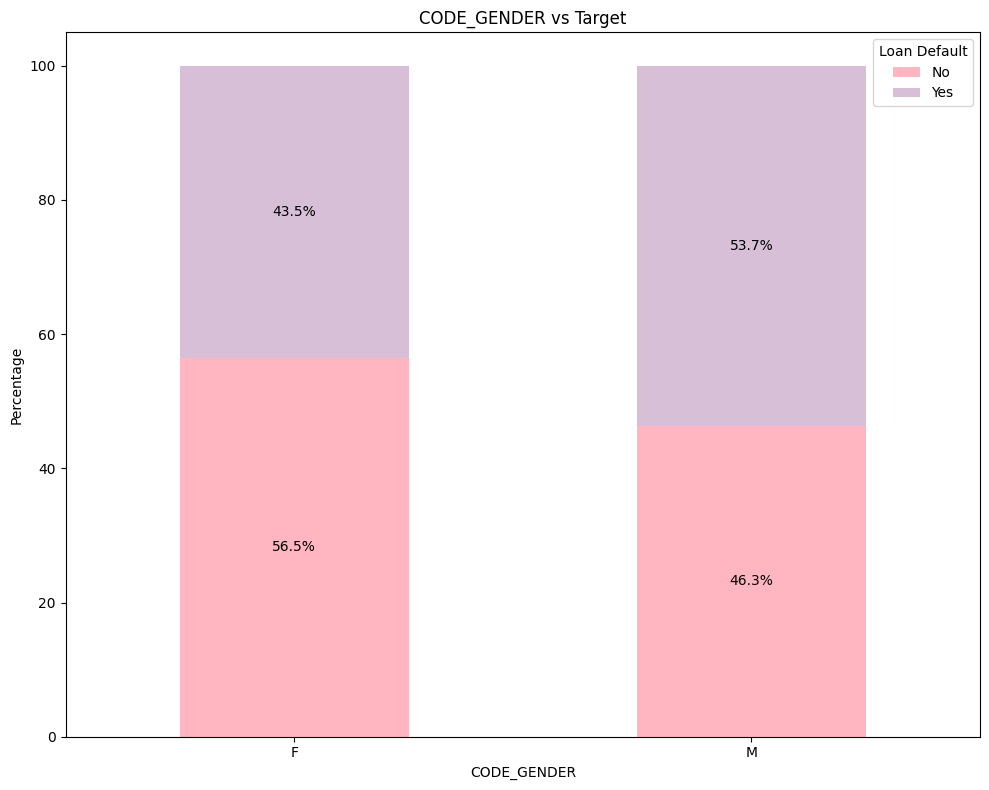

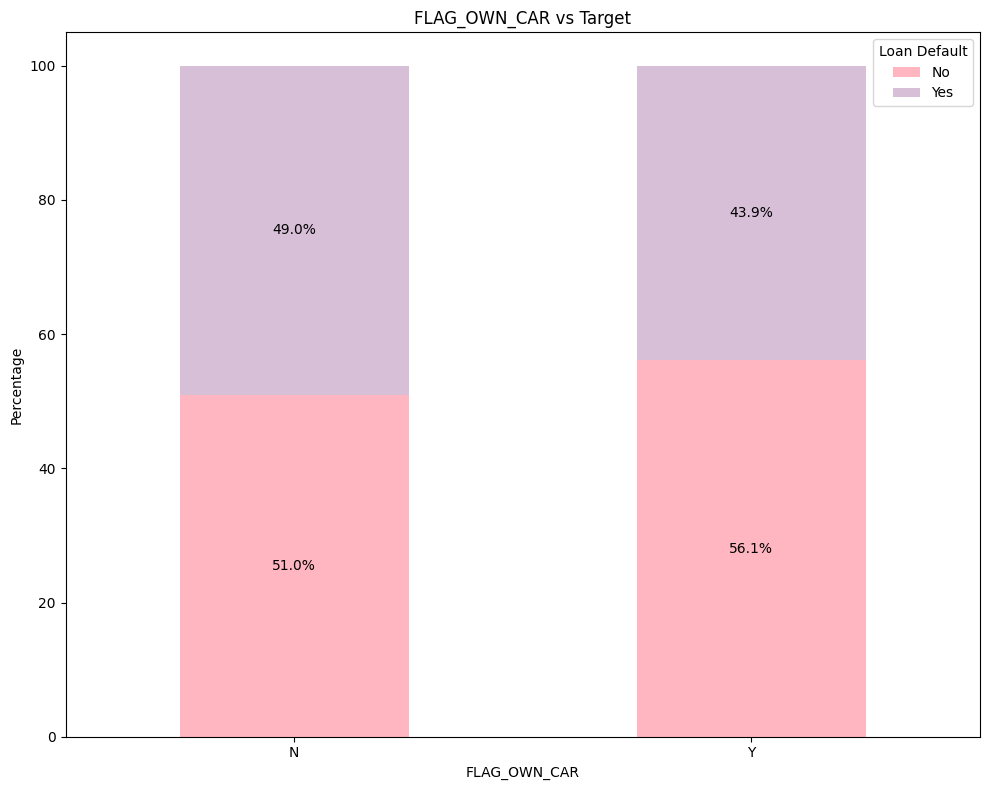

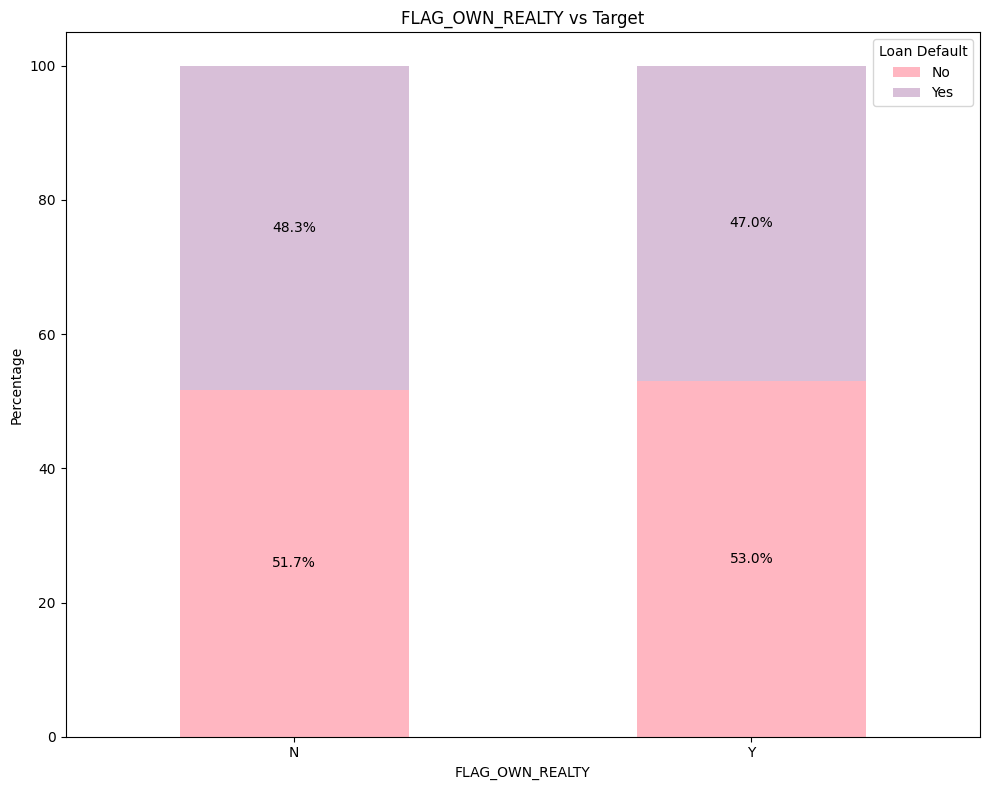

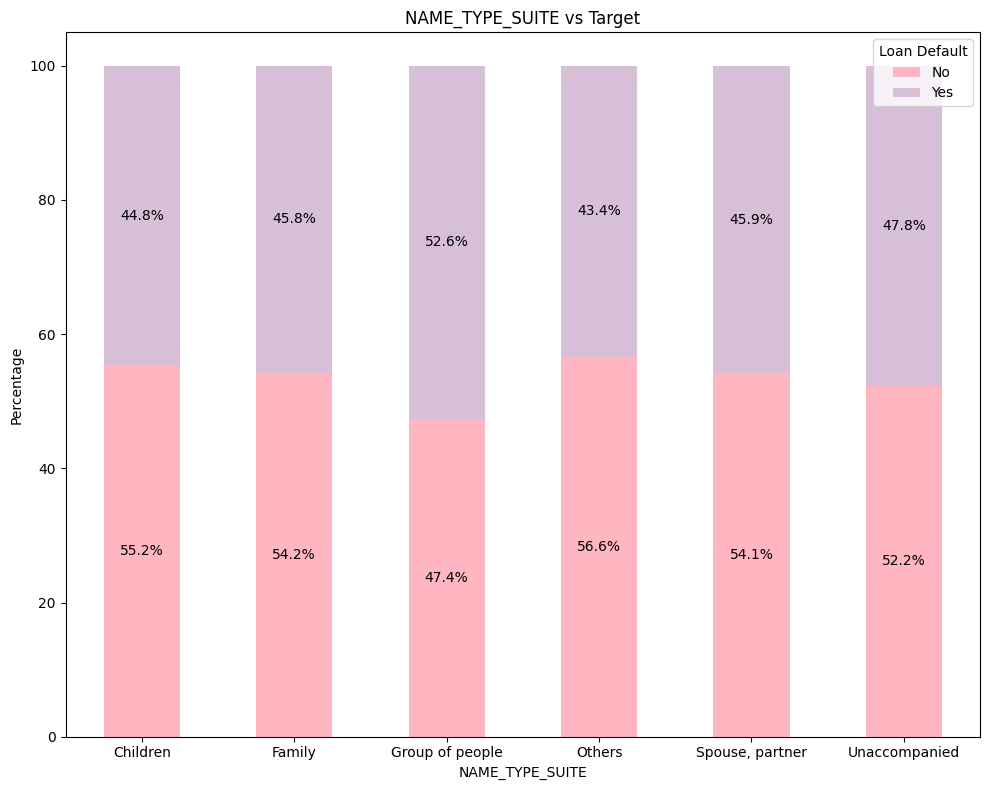

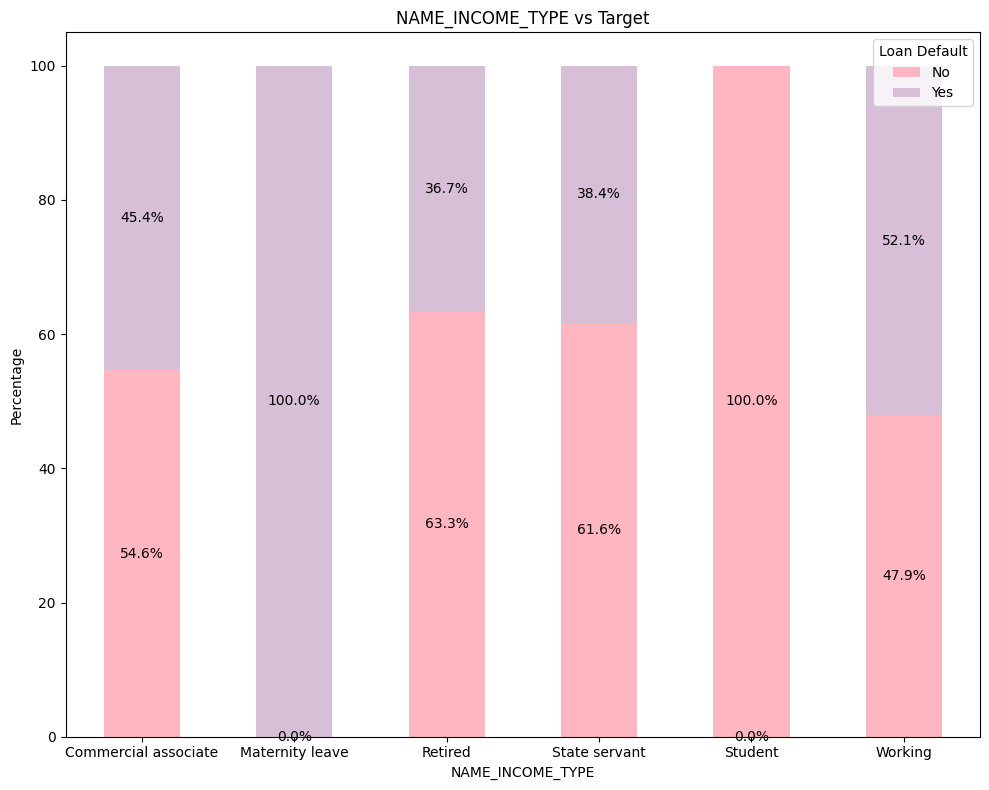

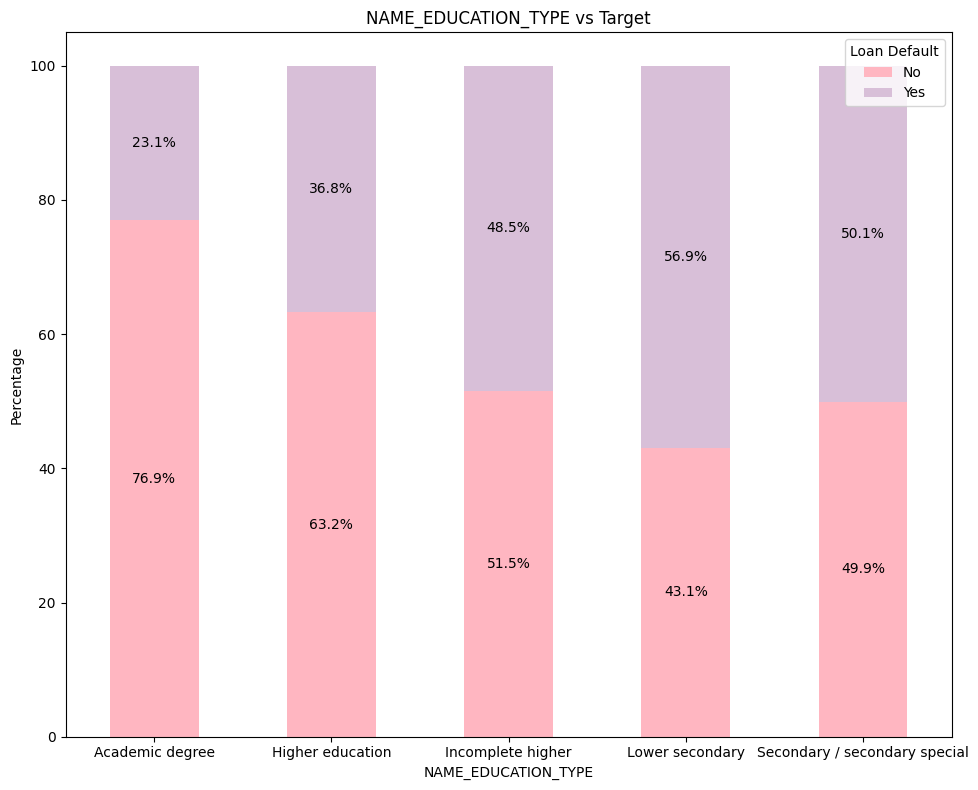

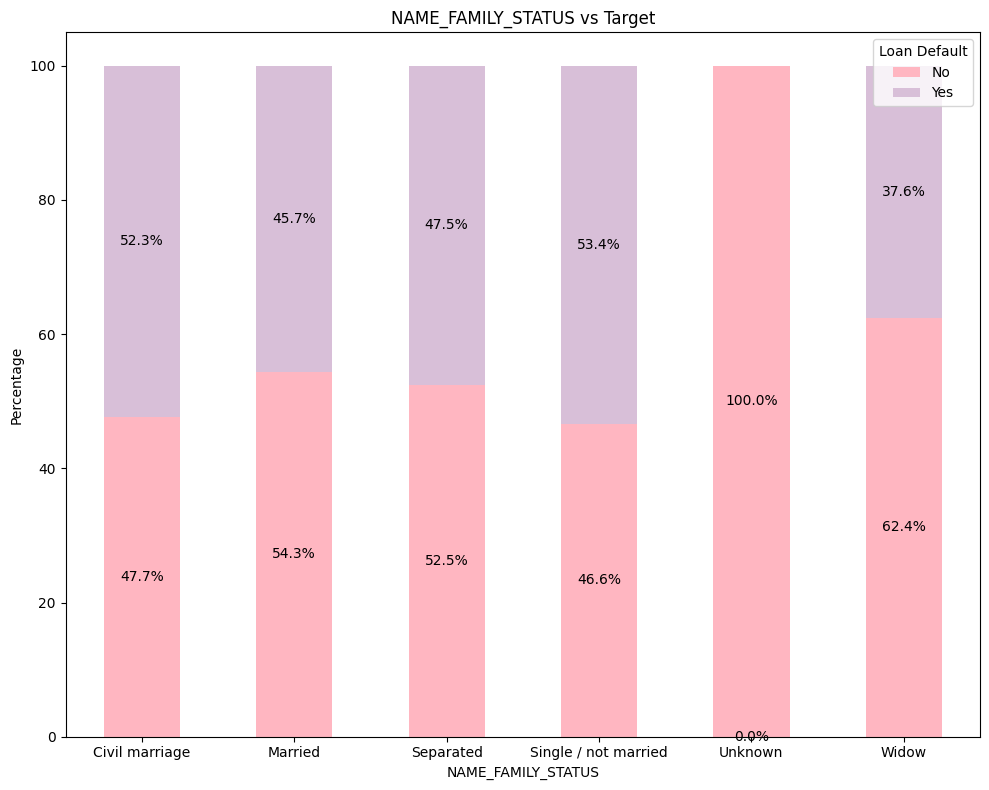

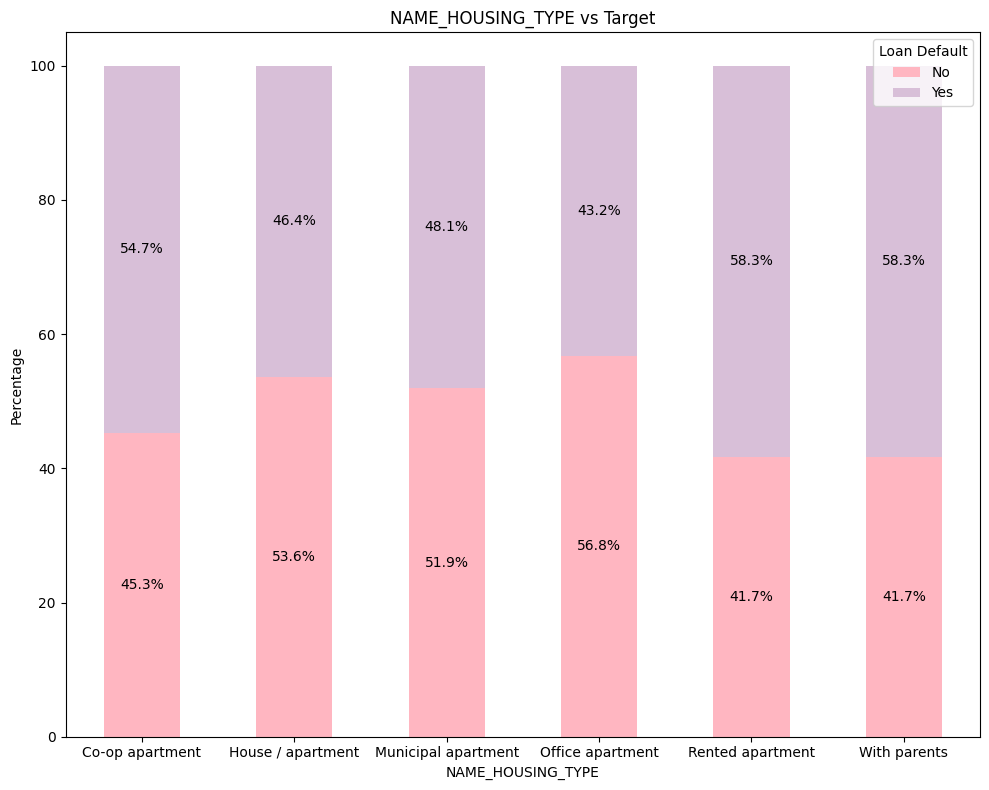

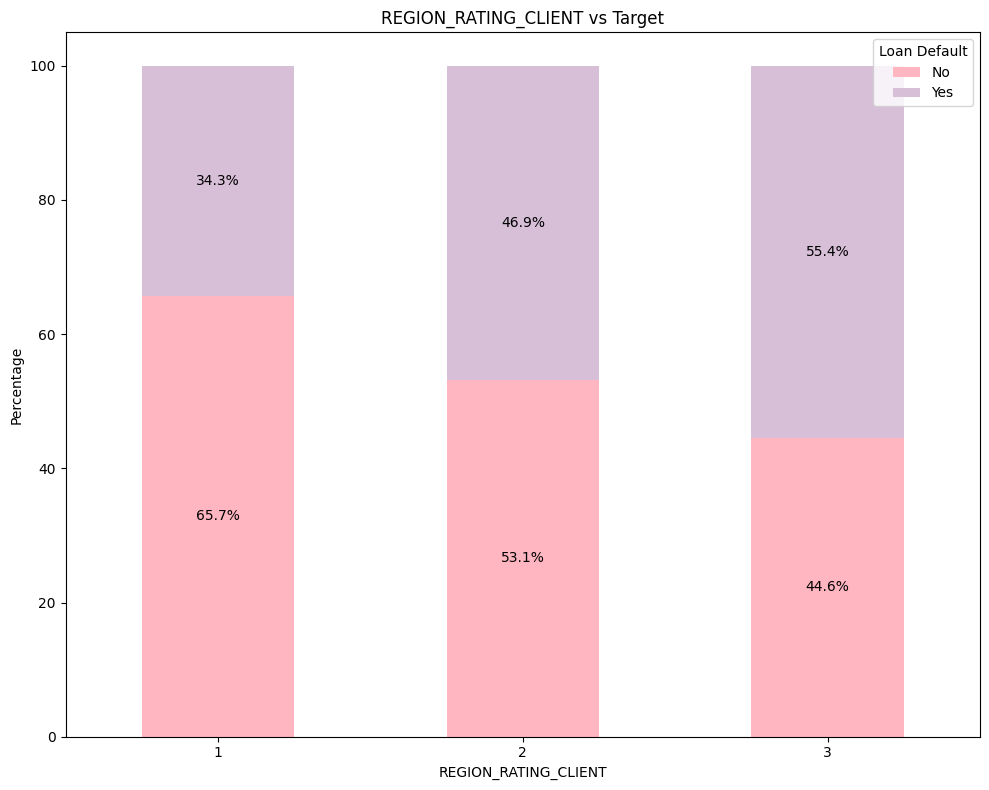

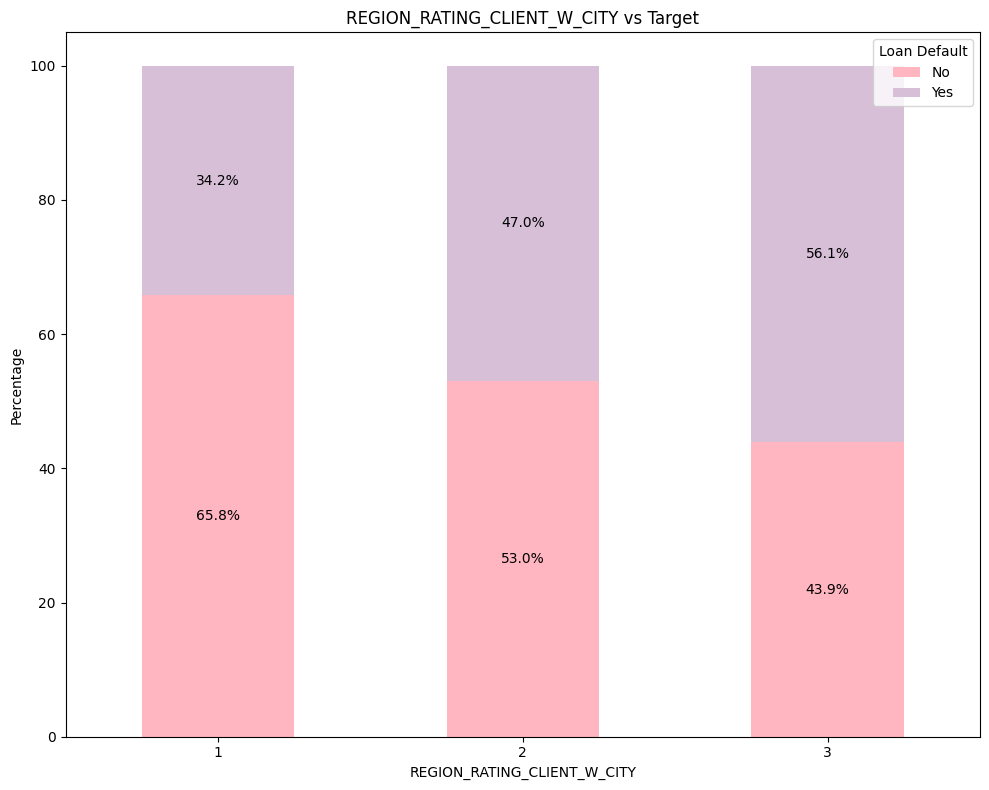

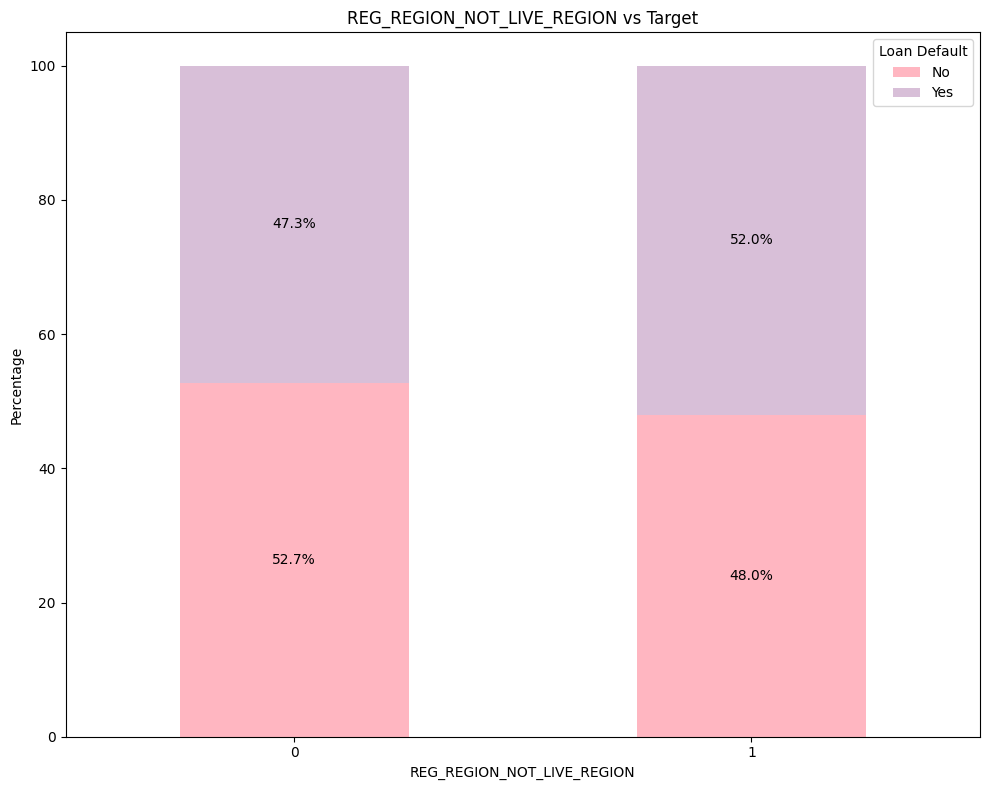

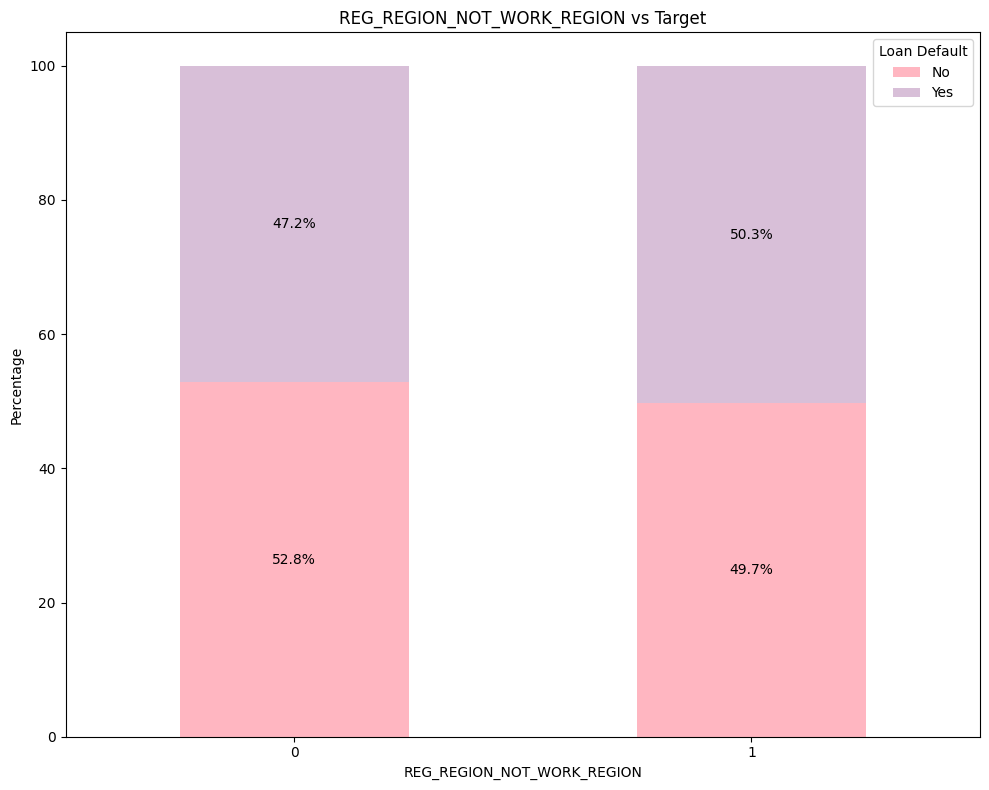

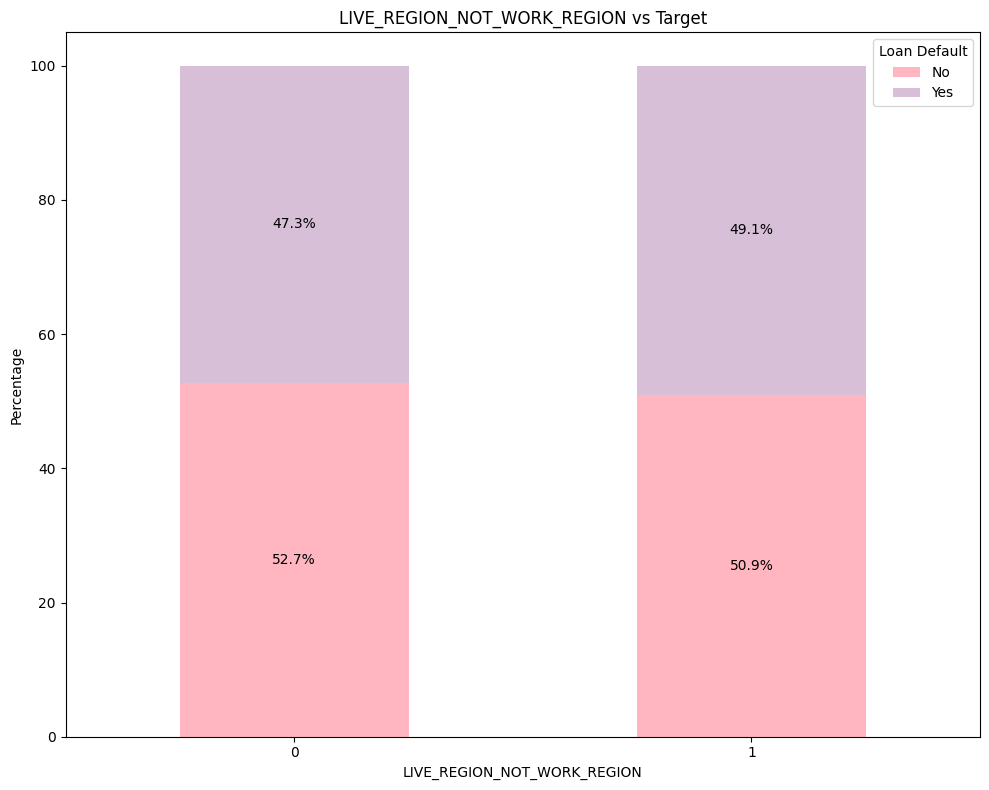

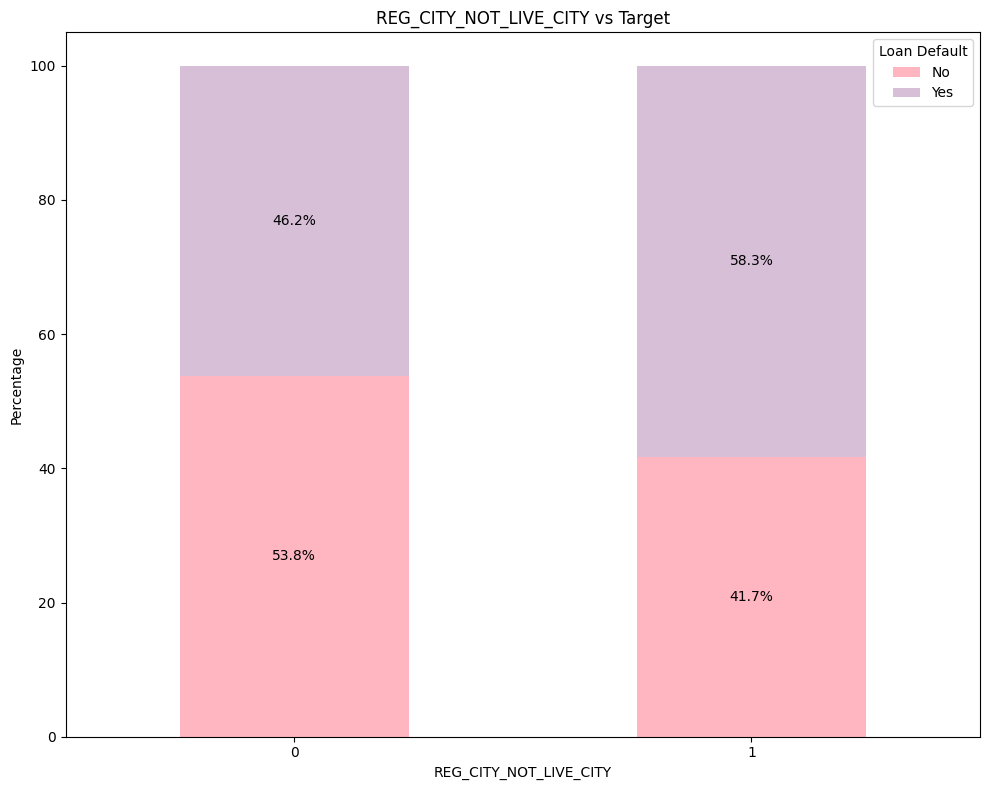

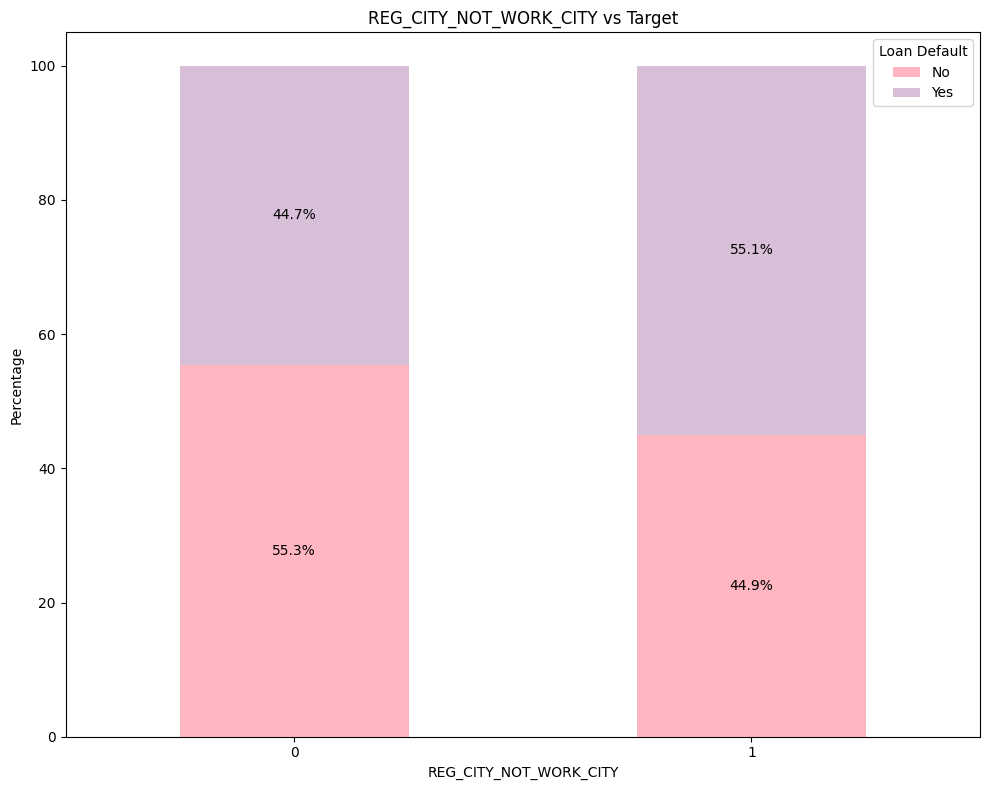

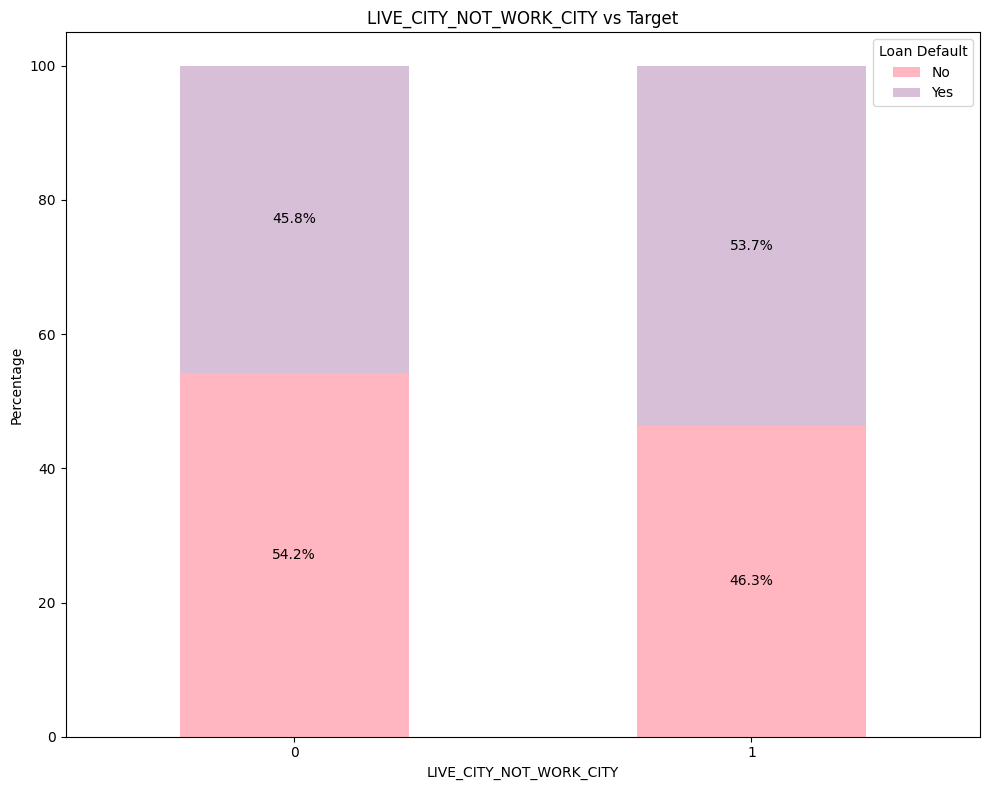

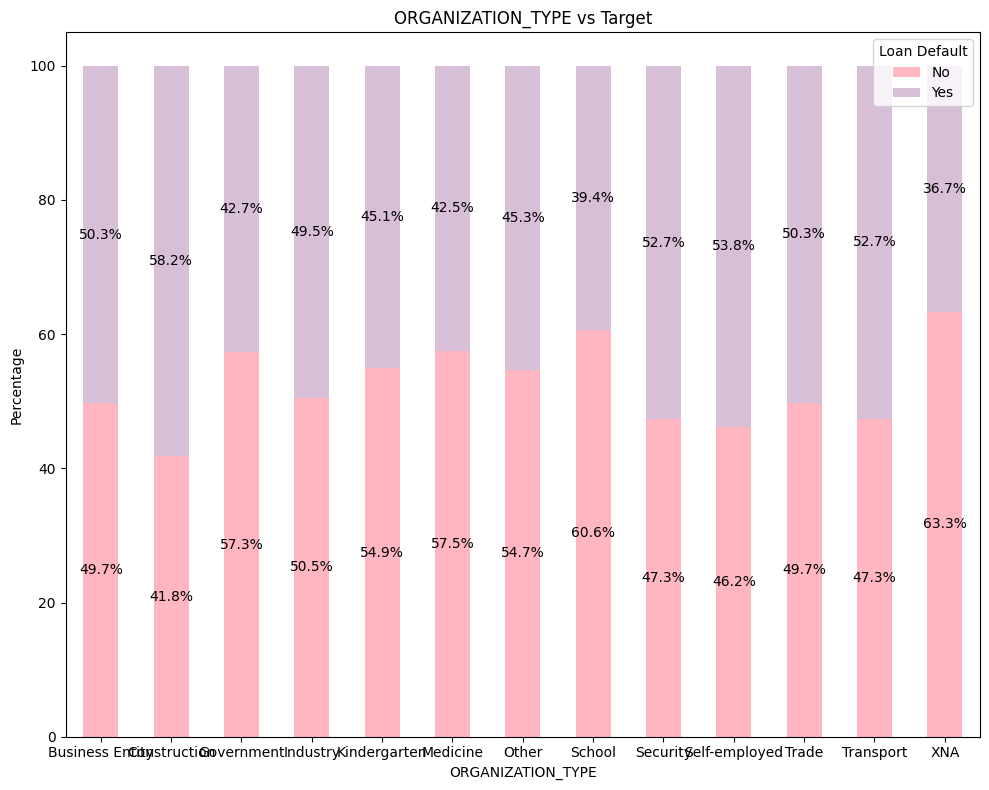

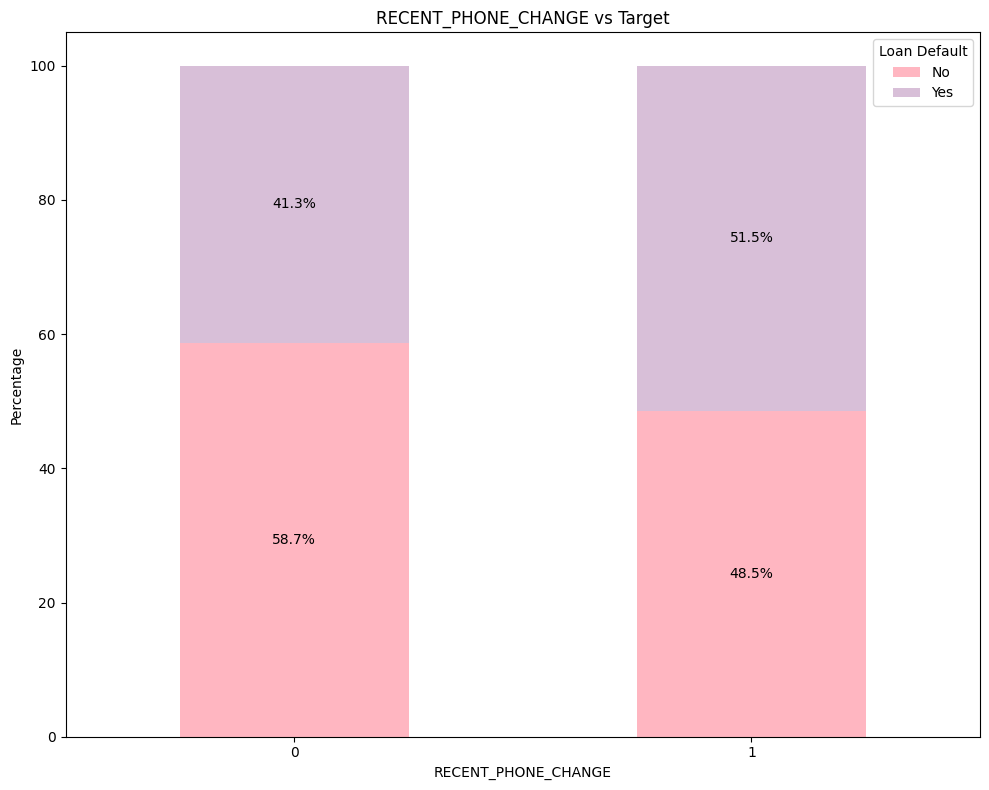

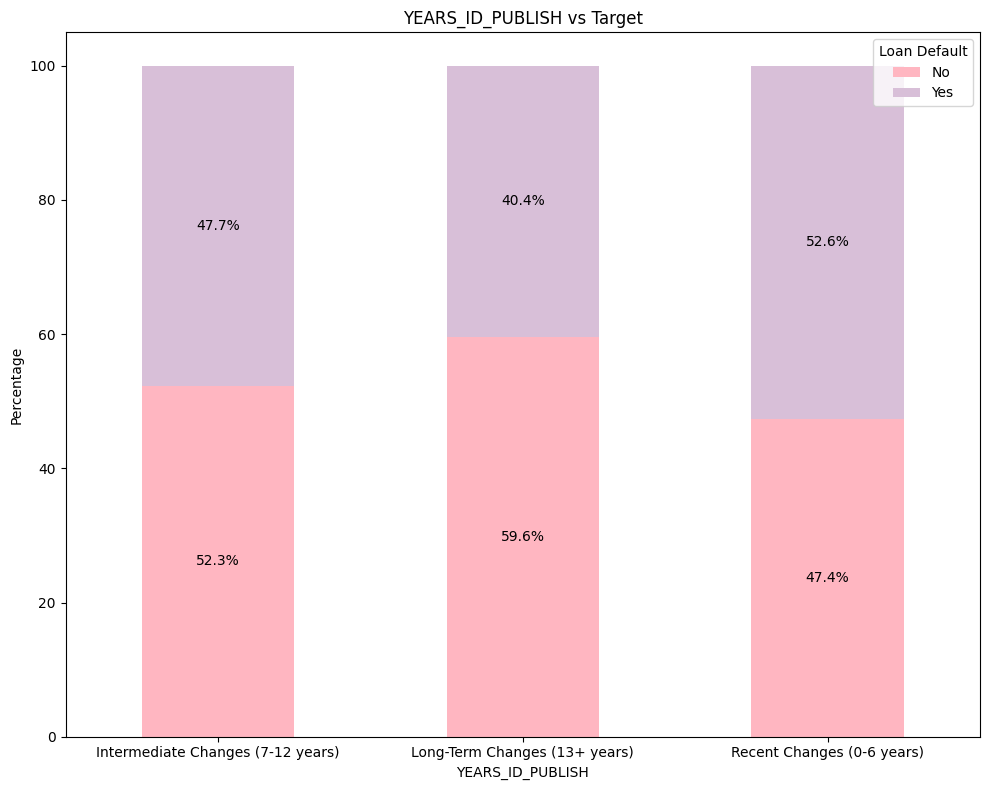

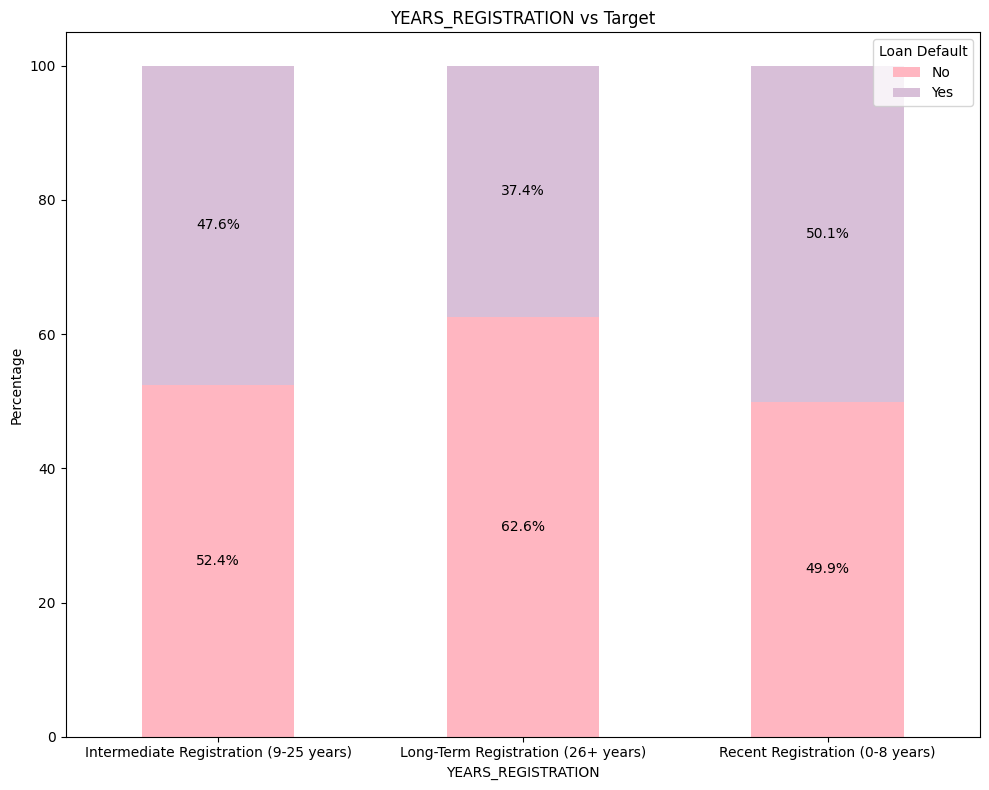

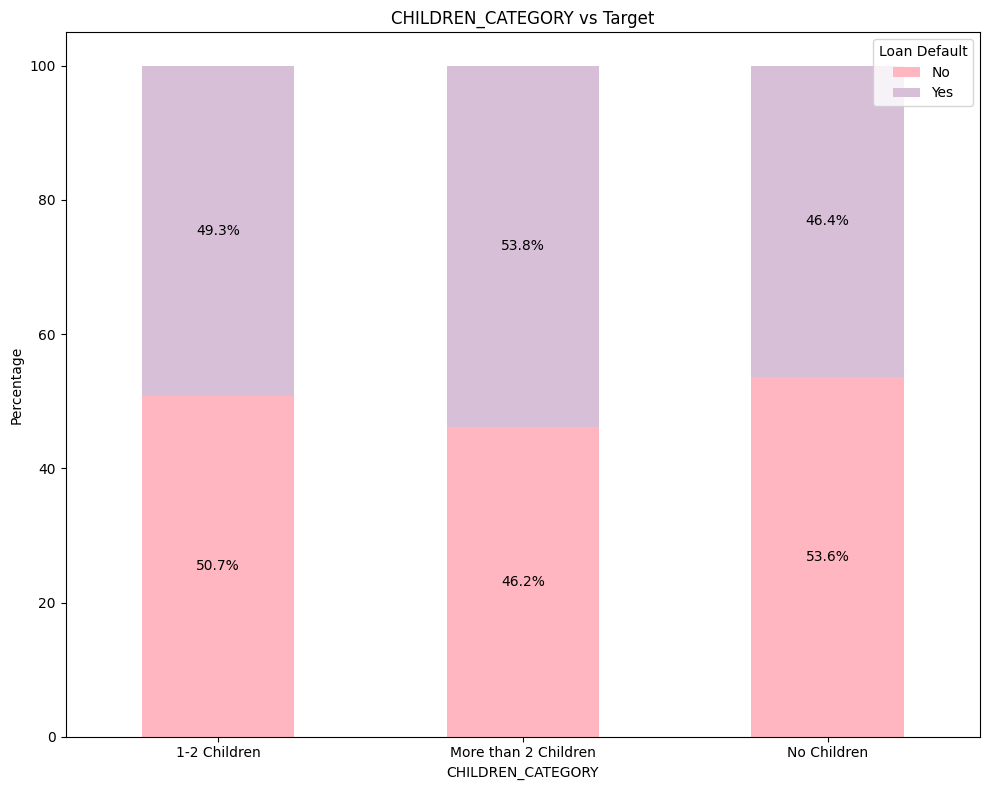

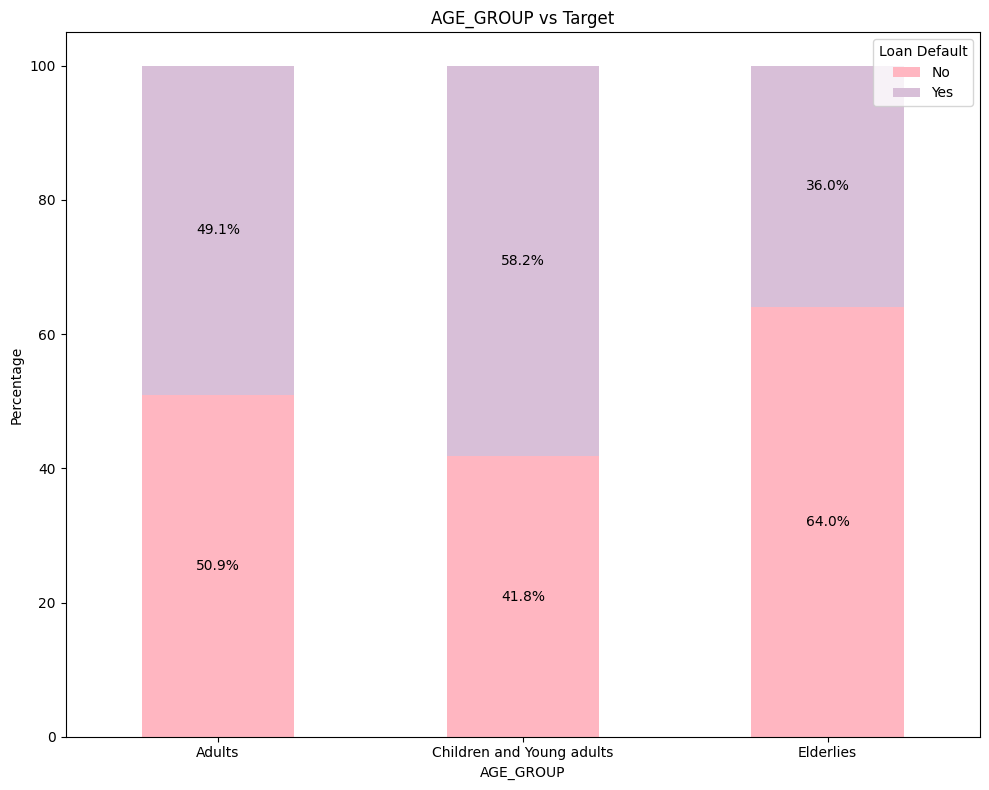

In [ ]:
# Iterate over categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # Group the data and calculate the percentage
    grouped_data = df.groupby([column, 'TARGET']).size().unstack()
    grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    grouped_data.plot(kind='bar', stacked=True, color=colors, rot=0, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.set_title(f'{column} vs Target')

    for container in ax.containers:
        ax.bar_label(container, fmt='%1.1f%%', label_type='center', fontsize=10, color='black')

    labels = ['No', 'Yes']
    ax.legend(labels=labels, title='Loan Default', loc='upper right')

    plt.tight_layout()
    plt.show()


In [ ]:
df['TARGET'].value_counts()

0    22343
1    20109
Name: TARGET, dtype: int64

# Outliers

Box plots are drawn to show extreme outliers.

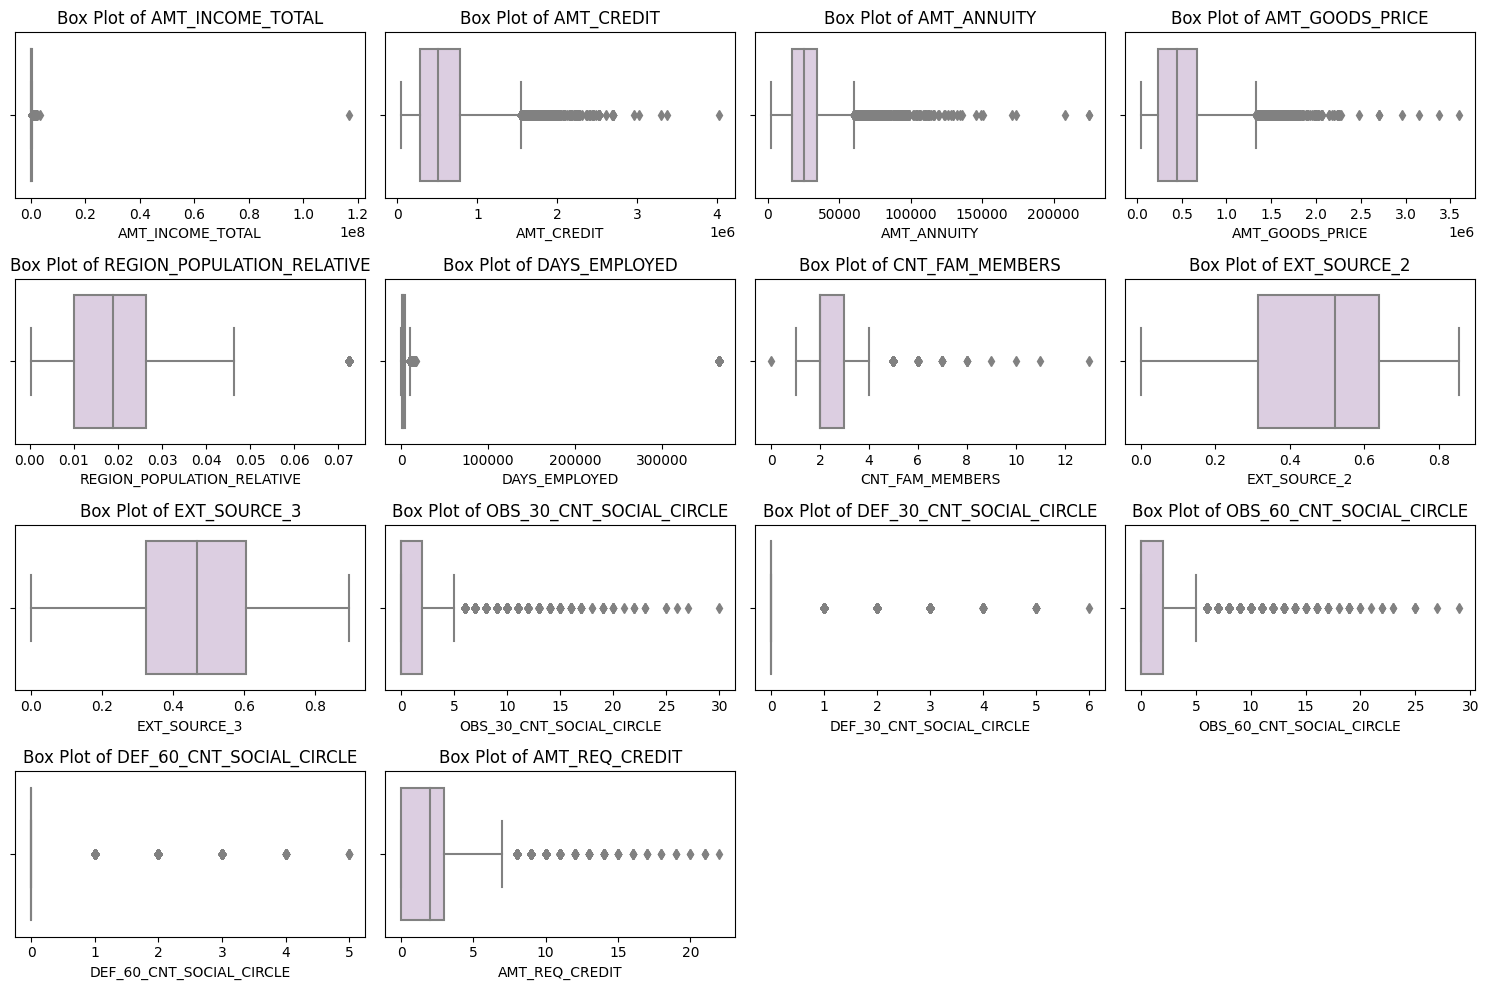

In [ ]:
# Assuming you have a DataFrame named 'df' containing numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

colors = sns.color_palette('Pastel1')[3]

# Calculate the number of rows and columns for subplots
num_features = len(numerical_cols)
num_cols = 4  # You can adjust the number of columns as needed

# Ensure you have enough rows to accommodate all the features
num_rows = (num_features - 1) // num_cols + 1

# Create subplots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[col], color=colors)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


Handle Outliers

In [ ]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Define a function to calculate the number of outliers using the IQR method
def count_iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Calculate the number of outliers for each numerical column
outlier_counts = count_iqr_outliers(numerical_cols)
outlier_counts = outlier_counts.sort_values(ascending=False)

outlier_counts

DAYS_EMPLOYED                 7059
DEF_30_CNT_SOCIAL_CIRCLE      5532
DEF_60_CNT_SOCIAL_CIRCLE      4119
OBS_30_CNT_SOCIAL_CIRCLE      2892
OBS_60_CNT_SOCIAL_CIRCLE      2833
AMT_INCOME_TOTAL              1727
AMT_GOODS_PRICE               1645
AMT_REQ_CREDIT                1189
AMT_CREDIT                    1066
AMT_ANNUITY                    913
REGION_POPULATION_RELATIVE     878
CNT_FAM_MEMBERS                586
EXT_SOURCE_2                     0
EXT_SOURCE_3                     0
dtype: int64

In [ ]:
# Calculate the number of outliers for each numerical column
outlier_counts = numerical_cols.apply(count_iqr_outliers)

# Calculate the total number of instances in your dataset
total_instances = len(df)

# Calculate the percentage of outliers and sort in descending order
percentage_outliers = (outlier_counts / total_instances * 100).sort_values(ascending=False)

# Iterate through numerical columns and print the percentage of outliers
for col, percentage in percentage_outliers.items():
    print(f"Percentage of outliers in '{col}': {percentage:.2f}%")


Percentage of outliers in 'DAYS_EMPLOYED': 16.63%
Percentage of outliers in 'DEF_30_CNT_SOCIAL_CIRCLE': 13.03%
Percentage of outliers in 'DEF_60_CNT_SOCIAL_CIRCLE': 9.70%
Percentage of outliers in 'OBS_30_CNT_SOCIAL_CIRCLE': 6.81%
Percentage of outliers in 'OBS_60_CNT_SOCIAL_CIRCLE': 6.67%
Percentage of outliers in 'AMT_INCOME_TOTAL': 4.07%
Percentage of outliers in 'AMT_GOODS_PRICE': 3.87%
Percentage of outliers in 'AMT_REQ_CREDIT': 2.80%
Percentage of outliers in 'AMT_CREDIT': 2.51%
Percentage of outliers in 'AMT_ANNUITY': 2.15%
Percentage of outliers in 'REGION_POPULATION_RELATIVE': 2.07%
Percentage of outliers in 'CNT_FAM_MEMBERS': 1.38%
Percentage of outliers in 'EXT_SOURCE_2': 0.00%
Percentage of outliers in 'EXT_SOURCE_3': 0.00%


In [ ]:
df.shape

(42452, 38)

In [ ]:
df = df[df['AMT_INCOME_TOTAL'] <= 3000000]

In [ ]:
df = df[df['AMT_ANNUITY'] <= 140000]

In [ ]:
df = df[df['AMT_GOODS_PRICE'] <= 2500000]

In [ ]:
df = df[df['AMT_CREDIT'] <= 3000000]

In [ ]:
df.shape

(42436, 38)

Replace extreme outliers with 0 because they are all pensioners

In [ ]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, 0)

In [ ]:
df.shape

(42436, 38)

Remove all outliers

In [ ]:
#outliers_remove= ['DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']

In [ ]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
#for col in outliers_remove:
 # df = remove_outliers_iqr(df, col)

In [ ]:
df.shape

(42436, 38)

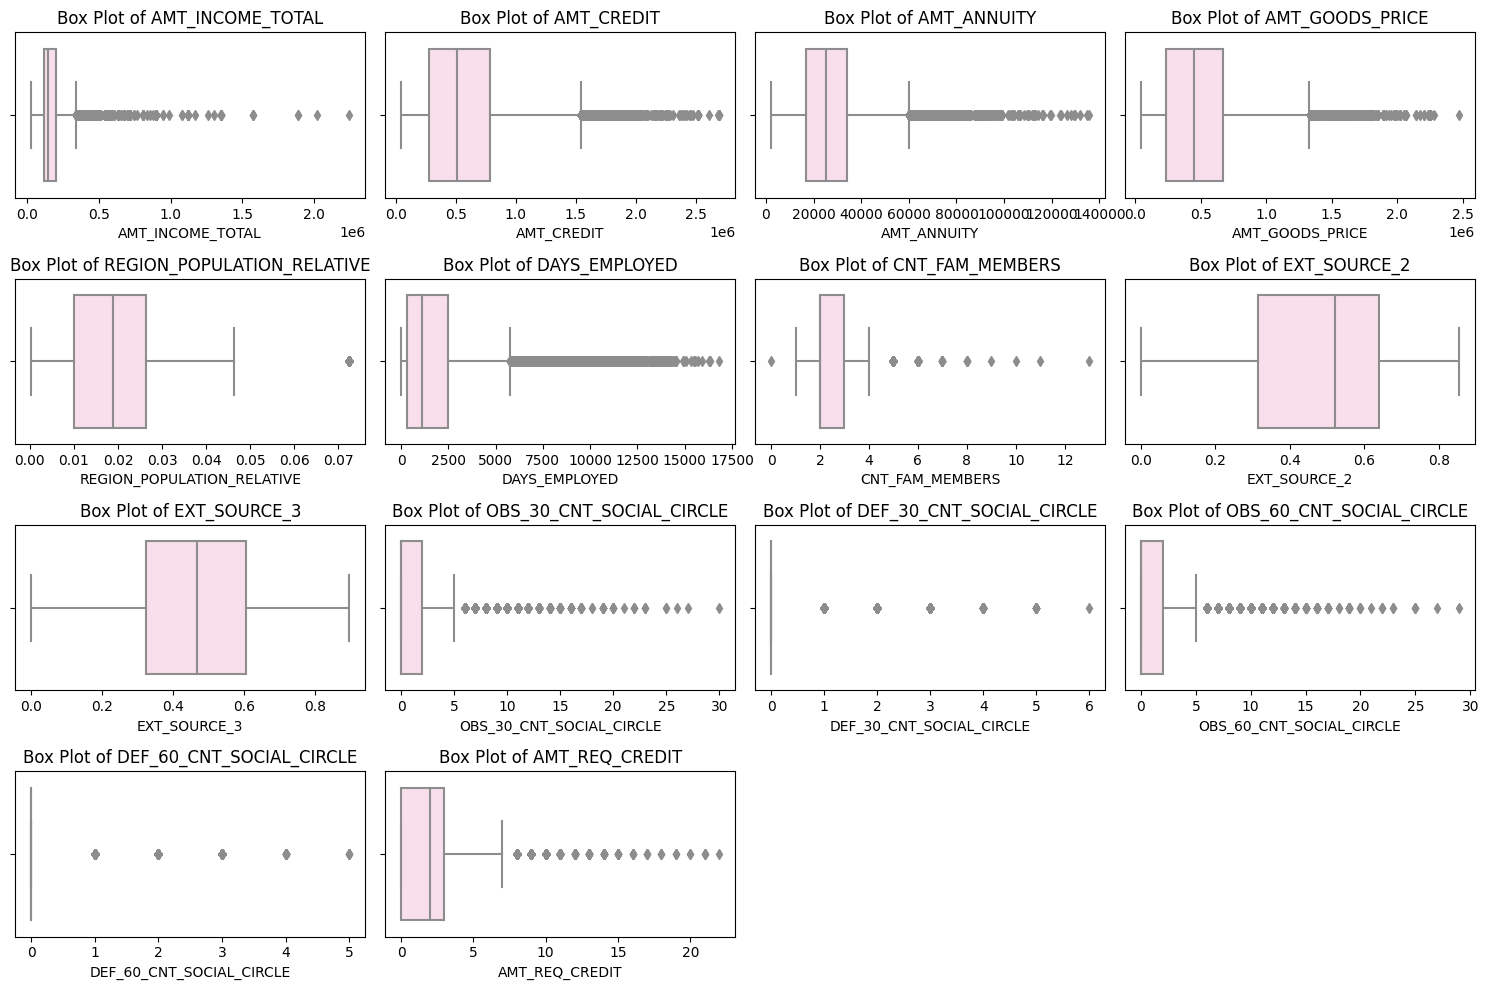

In [ ]:
# Assuming you have a DataFrame named 'df' containing numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

colors = sns.color_palette('Pastel1')[7]

# Calculate the number of rows and columns for subplots
num_features = len(numerical_cols)
num_cols = 4  # You can adjust the number of columns as needed

# Ensure you have enough rows to accommodate all the features
num_rows = (num_features - 1) // num_cols + 1

# Create subplots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[col], color=colors)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df['TARGET'].value_counts()

0    22333
1    20103
Name: TARGET, dtype: int64

# Correct Types

In [ ]:
df.dtypes

TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_EMPLOYED                    int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT            object
REGION_RATING_CLIENT_W_CITY     object
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION      object
LIVE_REGION_NOT_WORK_REGION     object
REG_CITY_NOT_LIVE_CITY          object
REG_CITY_NOT_WORK_CITY          object
LIVE_CITY_NOT_WORK_CITY         object
ORGANIZATION_TYPE        

In [ ]:
df['TARGET'] = df['TARGET'].astype('int64')
df['RECENT_PHONE_CHANGE'] = df['RECENT_PHONE_CHANGE'].astype('int64')

# Label Encoder

Custom mapping for categorical columns to utilise machine learning effectively

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        value_counts = df[col].value_counts()
        print(value_counts)

Cash loans         38982
Revolving loans     3454
Name: NAME_CONTRACT_TYPE, dtype: int64
F    26389
M    16047
Name: CODE_GENDER, dtype: int64
N    28603
Y    13833
Name: FLAG_OWN_CAR, dtype: int64
Y    29296
N    13140
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      34510
Family              5339
Spouse, partner     1541
Others               579
Children             429
Group of people       38
Name: NAME_TYPE_SUITE, dtype: int64
Working                 23711
Commercial associate     9438
Retired                  6624
State servant            2657
Student                     4
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    31481
Higher education                  8906
Incomplete higher                 1428
Lower secondary                    608
Academic degree                     13
Name: NAME_EDUCATION_TYPE, dtype: int64
Married                 26385
Single / not married     6797
Civil marriage           4534
Separated       

In [ ]:
# Get a list of column names
columns_to_encode = df.select_dtypes(include=['object']).columns


# Iterate through the selected columns and apply the custom mapping
for col in columns_to_encode:
    unique_values = df[col].unique()
    value_mapping = {value: index for index, value in enumerate(unique_values)}
    df[col] = df[col].map(value_mapping)


In [ ]:
df[columns_to_encode].head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_RATING_CLIENT,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_ID_PUBLISH,YEARS_REGISTRATION,CHILDREN_CATEGORY,AGE_GROUP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,1,2,1,0,1
4,0,0,1,0,1,1,1,0,1,0,...,0,0,0,1,1,2,1,0,0,1
5,0,1,0,0,0,1,1,4,0,0,...,1,1,0,1,1,3,0,1,1,1
6,0,0,0,0,0,0,2,2,0,0,...,1,0,1,1,0,0,1,0,0,1
7,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,1,3,1,1,0,0
8,1,0,0,0,0,1,2,2,0,0,...,0,0,0,0,0,4,1,1,2,1
9,0,1,0,0,0,1,2,3,0,2,...,0,0,0,0,0,0,1,1,1,1


In [ ]:
df['RECENT_PHONE_CHANGE'].value_counts()

1    25208
0    17228
Name: RECENT_PHONE_CHANGE, dtype: int64

In [ ]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'RECENT_PHONE_CHANGE', 'YEARS_ID_PUBLISH', 'YEARS_REGISTRATION',
       'CHILDREN_CATEGORY', 'AMT_REQ_CREDIT', 'AGE_GROUP'],
      dtype='object')

In [ ]:
df.shape

(42436, 38)

# Feature Importance

In [ ]:
X = df.drop('TARGET', axis=1)
y = df['TARGET'].copy()

from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(X, y);

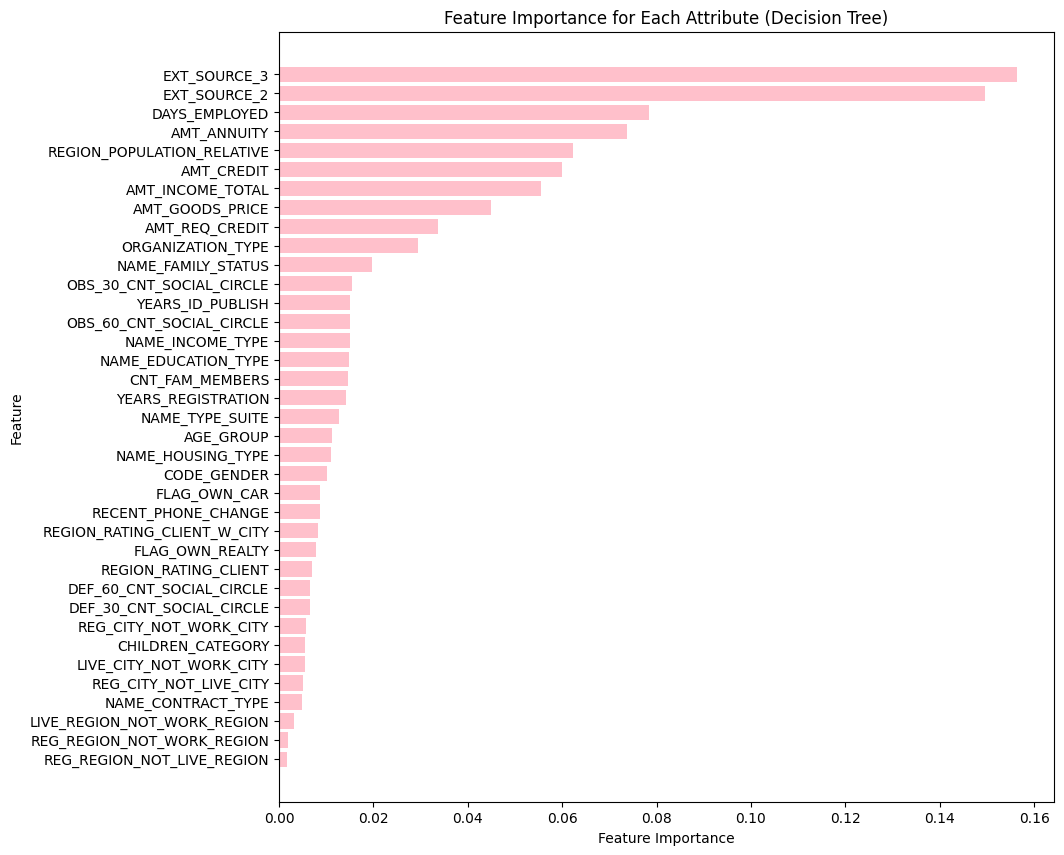

In [ ]:
feature_importances = clf.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color = 'pink')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Each Attribute (Decision Tree)')
plt.show()

In [ ]:
feature_importance_df.sort_values(ascending=False, by = 'Importance')

,Feature,Importance
26,EXT_SOURCE_3,0.156397
25,EXT_SOURCE_2,0.149634
14,DAYS_EMPLOYED,0.078443
6,AMT_ANNUITY,0.073738
13,REGION_POPULATION_RELATIVE,0.062191
5,AMT_CREDIT,0.059970
4,AMT_INCOME_TOTAL,0.055521
7,AMT_GOODS_PRICE,0.044924
35,AMT_REQ_CREDIT,0.033781
24,ORGANIZATION_TYPE,0.029533


# Selected Features

In [ ]:
# Select the features to keep
selected_features = [
    'TARGET',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_EMPLOYED',
    'AMT_ANNUITY',
    'REGION_POPULATION_RELATIVE',
    'AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'AMT_GOODS_PRICE',
    'AMT_REQ_CREDIT',
    'ORGANIZATION_TYPE',
    'NAME_FAMILY_STATUS',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'CNT_FAM_MEMBERS',
    'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE',
    'YEARS_REGISTRATION',
    'YEARS_ID_PUBLISH',
    'NAME_TYPE_SUITE',
    'AGE_GROUP',
    'NAME_HOUSING_TYPE',
    'CODE_GENDER',
    'RECENT_PHONE_CHANGE',
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_REALTY',
    'FLAG_OWN_CAR',
    'REGION_RATING_CLIENT_W_CITY',
    'CHILDREN_CATEGORY',
    ]

balanced_df = balanced_df[selected_features]

In [ ]:
balanced_df.shape

(44666, 29)

# Balance Dataset Using UpSampling

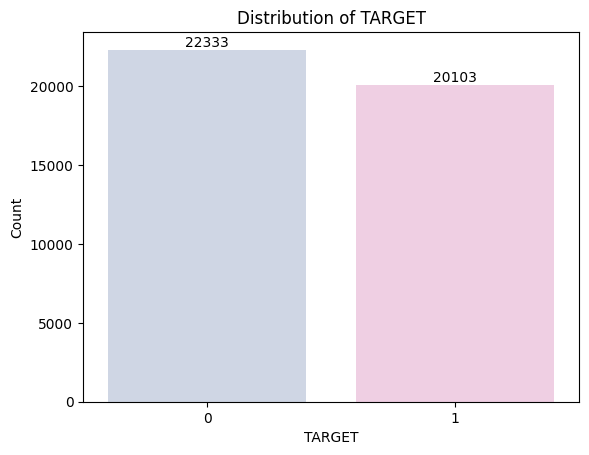

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors from Seaborn's pastel2 palette (colors 3 and 4)
colors = sns.color_palette("Pastel2")[2:4]

# Create a countplot with specified colors
ax = sns.countplot(data=df, x='TARGET', palette=colors)

plt.title("Distribution of TARGET")
plt.xlabel("TARGET")
plt.ylabel("Count")

# Annotate the count values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.show()


In [ ]:
import pandas as pd
from sklearn.utils import resample

balanced_df = df.copy()

# Separate the majority (class 0) and minority (class 1) classes
majority_class = balanced_df[balanced_df['TARGET'] == 0]
minority_class = balanced_df[balanced_df['TARGET'] == 1]

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the majority class
                              random_state=500)  # For reproducible results

# Combine the majority and upsampled minority classes
balanced_df = pd.concat([majority_class, minority_upsampled])

In [ ]:
print(majority_class.shape)
print(minority_class.shape)

(22333, 38)
(20103, 38)


In [ ]:
print(balanced_df['TARGET'].value_counts())

0    22333
1    22333
Name: TARGET, dtype: int64


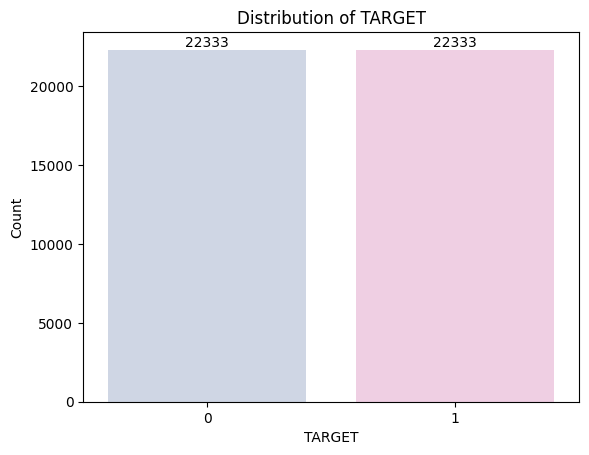

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors from Seaborn's pastel2 palette (colors 3 and 4)
colors = sns.color_palette("Pastel2")[2:4]

# Create a countplot with specified colors
ax = sns.countplot(data=balanced_df, x='TARGET', palette=colors)

plt.title("Distribution of TARGET")
plt.xlabel("TARGET")
plt.ylabel("Count")

# Annotate the count values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.show()

# Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_EMPLOYED',
    'REGION_POPULATION_RELATIVE',
    'AMT_ANNUITY',
    'AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'AMT_GOODS_PRICE',
    'CNT_FAM_MEMBERS',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT',
    'ORGANIZATION_TYPE'
   ]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
balanced_df[columns_to_scale] = scaler.fit_transform(balanced_df[columns_to_scale])

<ipython-input-91-eeabef83f96c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df[columns_to_scale] = scaler.fit_transform(balanced_df[columns_to_scale])


In [ ]:
balanced_df

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
20109,0,1.210921,1.106971,-0.852945,0.194570,2.049986,-0.011107,1.136200,-0.054370,1.721608,...,2,2,0,1,0,0,0,0,2,0
20110,0,1.452253,0.856650,-0.751910,-1.247738,-0.368959,-0.939915,-0.810413,-0.842985,-0.496704,...,0,1,0,0,1,0,0,0,0,1
20111,0,-0.497244,1.140252,2.297642,1.587283,-0.428030,0.366611,0.162893,0.471373,-0.940366,...,1,1,0,1,0,0,0,1,0,1
20112,0,1.624273,-0.052778,0.732309,-0.329875,-1.036141,0.499651,0.892874,0.734244,0.390621,...,0,1,4,0,0,0,1,0,0,0
20113,0,1.290800,0.935918,1.572371,1.142928,4.101317,2.290711,0.844208,1.785730,0.834283,...,0,1,0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11870,1,0.954092,1.205808,-0.440267,1.355722,0.887997,0.859543,-0.810413,1.128551,-0.496704,...,0,1,0,1,1,1,0,0,0,0
3816,1,-0.885695,-0.527562,-0.488176,1.443186,-0.773872,0.722904,2.985484,0.471373,-0.940366,...,0,1,2,0,0,0,1,0,0,0
5204,1,0.072226,-1.125537,-0.416550,-1.325148,-0.773872,-1.059878,-0.567087,-0.974420,-0.940366,...,0,0,0,1,1,1,0,0,0,0
189,1,0.884763,1.106971,1.563358,-0.035649,0.222453,0.859543,-0.469756,1.128551,-0.940366,...,0,1,0,1,0,0,0,0,0,0


# Decision Tree Prediction Model

In [ ]:
dct = balanced_df.copy()

In [ ]:
dct.head()

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
20109,0,1.210921,1.106971,-0.852945,0.194570,2.049986,-0.011107,1.136200,-0.054370,1.721608,...,2,2,0,1,0,0,0,0,2,0
20110,0,1.452253,0.856650,-0.751910,-1.247738,-0.368959,-0.939915,-0.810413,-0.842985,-0.496704,...,0,1,0,0,1,0,0,0,0,1
20111,0,-0.497244,1.140252,2.297642,1.587283,-0.428030,0.366611,0.162893,0.471373,-0.940366,...,1,1,0,1,0,0,0,1,0,1
20112,0,1.624273,-0.052778,0.732309,-0.329875,-1.036141,0.499651,0.892874,0.734244,0.390621,...,0,1,4,0,0,0,1,0,0,0
20113,0,1.290800,0.935918,1.572371,1.142928,4.101317,2.290711,0.844208,1.785730,0.834283,...,0,1,0,1,0,0,0,0,2,1


Split and Train

In [ ]:
from sklearn import tree
X = dct.drop('TARGET', axis=1)
y = dct['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 40, 70, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the Decision Tree classifier
dct_clf = tree.DecisionTreeClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=dct_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_dct_clf = grid_search.best_estimator_

# Use the best Decision Tree classifier to make predictions
dct_y_pred = best_dct_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dct_y_pred)
print(f'Accuracy with best parameters: {accuracy}')
print(f'Best parameters: {best_params}')

Accuracy with best parameters: 0.7244029850746269
Best parameters: {'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
dct_clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                                      max_depth = 40,
                                      max_features = None,
                                      min_samples_leaf = 1,
                                      min_samples_split = 2,
                                      splitter = 'best')
dct_clf.fit(X_train, y_train)
dct_y_pred = dct_clf.predict(X_test)

Confusion Matrix

Confusion Matrix:
 [[4425 2212]
 [1420 5343]]


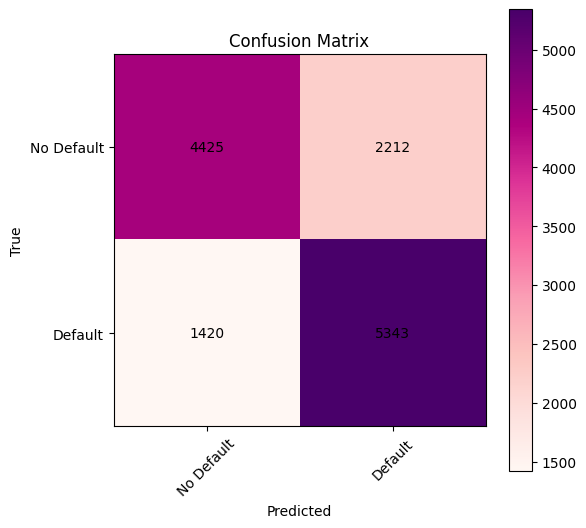

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
mat = confusion_matrix(y_test, dct_y_pred)
print("Confusion Matrix:\n", mat)

# Create a custom confusion matrix plot
plt.figure(figsize=(6, 6))
plt.imshow(mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = ['No Default', 'Default']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values within the cells
thresh = mat.max() / 2.0
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, format(mat[i, j], 'd'),
                 ha="center", va="center",
                 color="black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


Accuracy and ROC

Accuracy: 0.728955223880597


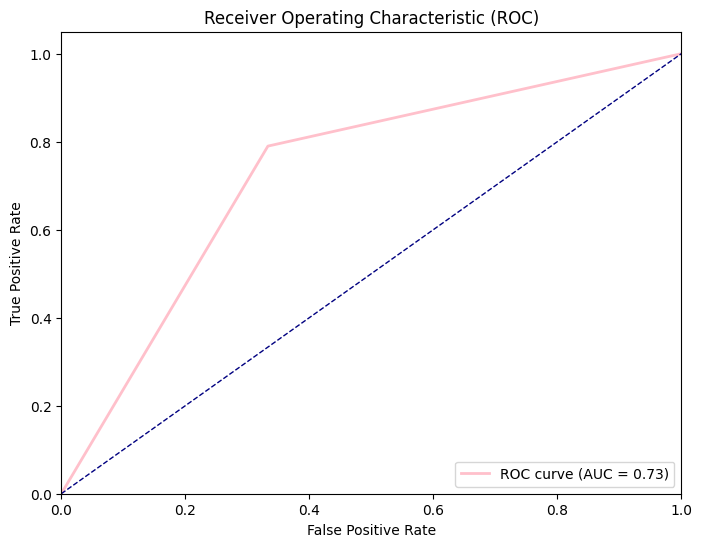

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, dct_y_pred)
print(f'Accuracy: {accuracy}')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, dct_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, dct_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

dct_report = classification_report(y_test, dct_y_pred)

print(dct_report)

              precision    recall  f1-score   support

           0       0.76      0.66      0.70      6637
           1       0.70      0.79      0.74      6763

    accuracy                           0.73     13400
   macro avg       0.73      0.72      0.72     13400
weighted avg       0.73      0.73      0.72     13400



# k-NN Classifier

In [ ]:
knn = balanced_df.copy()

In [ ]:
knn.head()

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
20109,0,1.210921,1.106971,-0.852945,0.194570,2.049986,-0.011107,1.136200,-0.054370,1.721608,...,2,2,0,1,0,0,0,0,2,0
20110,0,1.452253,0.856650,-0.751910,-1.247738,-0.368959,-0.939915,-0.810413,-0.842985,-0.496704,...,0,1,0,0,1,0,0,0,0,1
20111,0,-0.497244,1.140252,2.297642,1.587283,-0.428030,0.366611,0.162893,0.471373,-0.940366,...,1,1,0,1,0,0,0,1,0,1
20112,0,1.624273,-0.052778,0.732309,-0.329875,-1.036141,0.499651,0.892874,0.734244,0.390621,...,0,1,4,0,0,0,1,0,0,0
20113,0,1.290800,0.935918,1.572371,1.142928,4.101317,2.290711,0.844208,1.785730,0.834283,...,0,1,0,1,0,0,0,0,2,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# Create the KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_clf, param_grid, cv=3)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best estimator on the test set
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Test Accuracy: 0.7264179104477612


In [ ]:
X = knn.drop('TARGET', axis=1)
y = knn['TARGET']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Construct a kNN classifier.
knn_clf = KNeighborsClassifier(algorithm = 'auto',
                               n_neighbors = 9,
                               weights = 'distance')
knn_clf.fit(X_train, y_train)

# print the potential classes
knn_clf.classes_

knn_y_pred = knn_clf.predict(X_test)

Confusion Matrix:
 [[4088 2549]
 [1117 5646]]


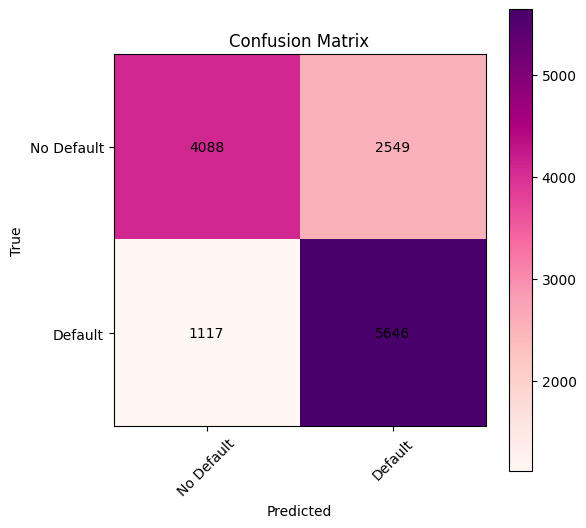

In [ ]:
# Calculate the confusion matrix
mat = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:\n", mat)

# Create a custom confusion matrix plot
plt.figure(figsize=(6, 6))
plt.imshow(mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = ['No Default', 'Default']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values within the cells
thresh = mat.max() / 2.0
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, format(mat[i, j], 'd'),
                 ha="center", va="center",
                 color="black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [ ]:
knn_clf.score(X_test, y_test)

0.7264179104477612

Accuracy: 0.7264179104477612


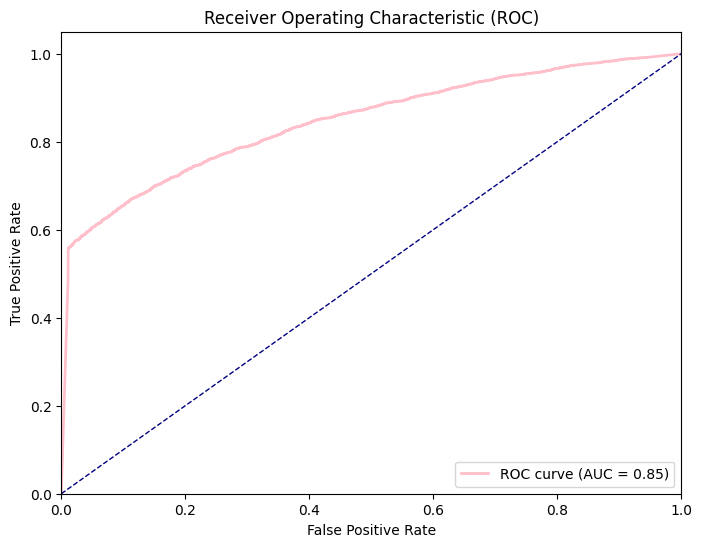

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, knn_y_pred)
print(f'Accuracy: {accuracy}')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, knn_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

knn_report = classification_report(y_test, knn_y_pred)

print(knn_report)

              precision    recall  f1-score   support

           0       0.79      0.62      0.69      6637
           1       0.69      0.83      0.75      6763

    accuracy                           0.73     13400
   macro avg       0.74      0.73      0.72     13400
weighted avg       0.74      0.73      0.72     13400



# MLP Classifier

In [ ]:
mlp = balanced_df.copy()

In [ ]:
mlp.head()

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
20109,0,1.210921,1.106971,-0.852945,0.194570,2.049986,-0.011107,1.136200,-0.054370,1.721608,...,2,2,0,1,0,0,0,0,2,0
20110,0,1.452253,0.856650,-0.751910,-1.247738,-0.368959,-0.939915,-0.810413,-0.842985,-0.496704,...,0,1,0,0,1,0,0,0,0,1
20111,0,-0.497244,1.140252,2.297642,1.587283,-0.428030,0.366611,0.162893,0.471373,-0.940366,...,1,1,0,1,0,0,0,1,0,1
20112,0,1.624273,-0.052778,0.732309,-0.329875,-1.036141,0.499651,0.892874,0.734244,0.390621,...,0,1,4,0,0,0,1,0,0,0
20113,0,1.290800,0.935918,1.572371,1.142928,4.101317,2.290711,0.844208,1.785730,0.834283,...,0,1,0,1,0,0,0,0,2,1


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(10,10),(50,50),(150,150)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create the MLPClassifier
mlp_clf = MLPClassifier(random_state=0, max_iter=100)

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp_clf, param_grid, cv=3)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best estimator on the test set
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 150)}
Test Accuracy: 0.7152238805970149


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
X = mlp.drop('TARGET', axis=1)
y = mlp['TARGET']

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=0, alpha = 0.0001, verbose=True, max_iter=1000, activation = 'tanh')

mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 0.61414516
Iteration 2, loss = 0.60402341
Iteration 3, loss = 0.60182232
Iteration 4, loss = 0.59977113
Iteration 5, loss = 0.59721634
Iteration 6, loss = 0.59549081
Iteration 7, loss = 0.59354976
Iteration 8, loss = 0.59197731
Iteration 9, loss = 0.59154281
Iteration 10, loss = 0.58863203
Iteration 11, loss = 0.58855119
Iteration 12, loss = 0.58631113
Iteration 13, loss = 0.58622700
Iteration 14, loss = 0.58410694
Iteration 15, loss = 0.58268731
Iteration 16, loss = 0.58196887
Iteration 17, loss = 0.57897093
Iteration 18, loss = 0.57709782
Iteration 19, loss = 0.57589019
Iteration 20, loss = 0.57395032
Iteration 21, loss = 0.57155491
Iteration 22, loss = 0.56942307
Iteration 23, loss = 0.56813463
Iteration 24, loss = 0.56395788
Iteration 25, loss = 0.56230452
Iteration 26, loss = 0.56020174
Iteration 27, loss = 0.55734881
Iteration 28, loss = 0.55631343
Iteration 29, loss = 0.55331875
Iteration 30, loss = 0.55133651
Iteration 31, loss = 0.54731005
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000,
              random_state=0, verbose=True)

Confusion Matrix:
 [[4447 2190]
 [1469 5294]]


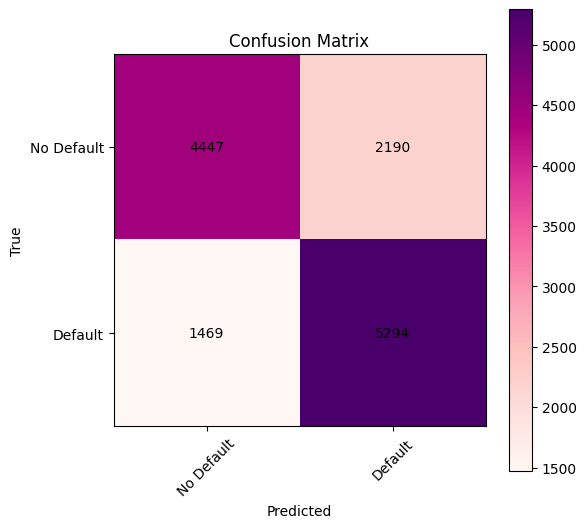

In [ ]:
mlp_y_pred = mlp_clf.predict(X_test)

# Calculate the confusion matrix
mat = confusion_matrix(y_test, mlp_y_pred)
print("Confusion Matrix:\n", mat)

# Create a custom confusion matrix plot
plt.figure(figsize=(6, 6))
plt.imshow(mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = ['No Default', 'Default']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values within the cells
thresh = mat.max() / 2.0
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, format(mat[i, j], 'd'),
                 ha="center", va="center",
                 color="black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

Accuracy: 0.7269402985074627


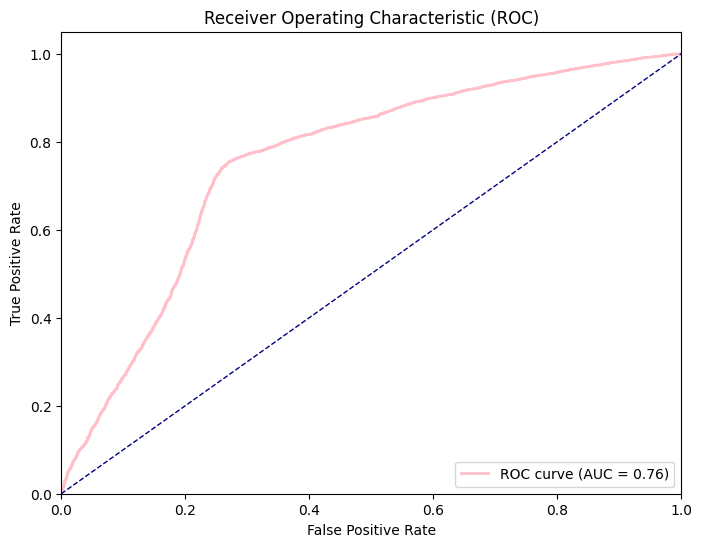

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, mlp_y_pred)
print(f'Accuracy: {accuracy}')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, mlp_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, mlp_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

mlp_report = classification_report(y_test, mlp_y_pred)

print(mlp_report)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      6637
           1       0.71      0.78      0.74      6763

    accuracy                           0.73     13400
   macro avg       0.73      0.73      0.73     13400
weighted avg       0.73      0.73      0.73     13400



# Random Forest

In [ ]:
rdf = balanced_df.copy()

In [ ]:
rdf.head()

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
20109,0,1.210921,1.106971,-0.852945,0.194570,2.049986,-0.011107,1.136200,-0.054370,1.721608,...,2,2,0,1,0,0,0,0,2,0
20110,0,1.452253,0.856650,-0.751910,-1.247738,-0.368959,-0.939915,-0.810413,-0.842985,-0.496704,...,0,1,0,0,1,0,0,0,0,1
20111,0,-0.497244,1.140252,2.297642,1.587283,-0.428030,0.366611,0.162893,0.471373,-0.940366,...,1,1,0,1,0,0,0,1,0,1
20112,0,1.624273,-0.052778,0.732309,-0.329875,-1.036141,0.499651,0.892874,0.734244,0.390621,...,0,1,4,0,0,0,1,0,0,0
20113,0,1.290800,0.935918,1.572371,1.142928,4.101317,2.290711,0.844208,1.785730,0.834283,...,0,1,0,1,0,0,0,0,2,1


In [ ]:
X = rdf.drop('TARGET', axis=1)
y = rdf['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 200, num=10)]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': [max_depth, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf_clf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

best_estimator = rf_random.best_estimator_

# Evaluate the best estimator on the test set
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
153 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Test Accuracy: 0.7991044776119403


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Construct a random forest classifier.
rdf_clf = RandomForestClassifier(oob_score=True,
                                 n_estimators = 1000,
                                 max_depth = None,
                                 max_features = 'log2',
                                 min_samples_leaf = 1,
                                 min_samples_split = 2)
rdf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=1000, oob_score=True)

Confusion Matrix:
 [[5175 1462]
 [1332 5431]]


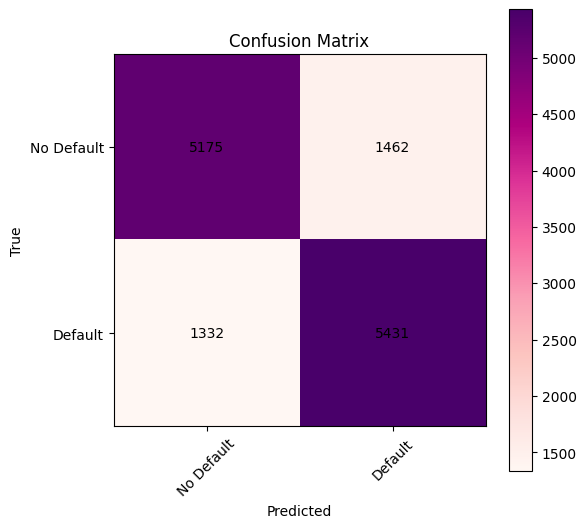

In [ ]:
rdf_y_pred = rdf_clf.predict(X_test)

# Calculate the confusion matrix
mat = confusion_matrix(y_test, rdf_y_pred)
print("Confusion Matrix:\n", mat)

# Create a custom confusion matrix plot
plt.figure(figsize=(6, 6))
plt.imshow(mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = ['No Default', 'Default']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values within the cells
thresh = mat.max() / 2.0
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, format(mat[i, j], 'd'),
                 ha="center", va="center",
                 color="black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

Accuracy: 0.7914925373134328


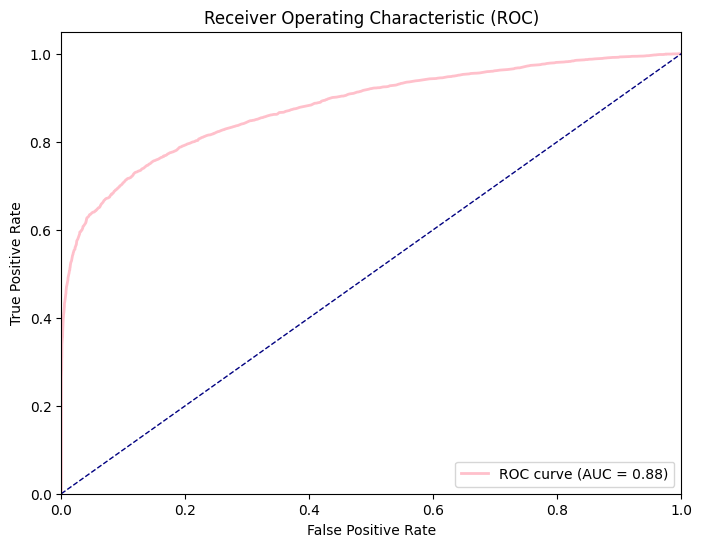

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, rdf_y_pred)
print(f'Accuracy: {accuracy}')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rdf_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, rdf_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

rdf_report = classification_report(y_test, rdf_y_pred)

print(rdf_report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6637
           1       0.79      0.80      0.80      6763

    accuracy                           0.79     13400
   macro avg       0.79      0.79      0.79     13400
weighted avg       0.79      0.79      0.79     13400



# Support Vector Machines

In [ ]:
svm = balanced_df.copy()

In [ ]:
svm.head()

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
20109,0,1.210921,1.106971,-0.852945,0.194570,2.049986,-0.011107,1.136200,-0.054370,1.721608,...,2,2,0,1,0,0,0,0,2,0
20110,0,1.452253,0.856650,-0.751910,-1.247738,-0.368959,-0.939915,-0.810413,-0.842985,-0.496704,...,0,1,0,0,1,0,0,0,0,1
20111,0,-0.497244,1.140252,2.297642,1.587283,-0.428030,0.366611,0.162893,0.471373,-0.940366,...,1,1,0,1,0,0,0,1,0,1
20112,0,1.624273,-0.052778,0.732309,-0.329875,-1.036141,0.499651,0.892874,0.734244,0.390621,...,0,1,4,0,0,0,1,0,0,0
20113,0,1.290800,0.935918,1.572371,1.142928,4.101317,2.290711,0.844208,1.785730,0.834283,...,0,1,0,1,0,0,0,0,2,1


In [ ]:
X = svm.drop('TARGET', axis=1)
y = svm['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid with possible values
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVM classifier
svm_clf = SVC()

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=svm_clf, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=0)

# Fit the random search to your data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params = random_search.best_params_
best_svm_clf = random_search.best_estimator_

# Use the best SVM classifier to make predictions
svm_y_pred = best_svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Accuracy with best parameters: {accuracy}')
print(f'Best parameters: {best_params}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy with best parameters: 0.7007462686567164
Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True, C = 10, kernel='rbf', gamma='scale', random_state=0)
svm_clf.fit(X_train, y_train)

SVC(C=10, probability=True, random_state=0)

In [ ]:
svm_y_pred = svm_clf.predict(X_test)

Confusion Matrix:
 [[4523 2114]
 [1896 4867]]


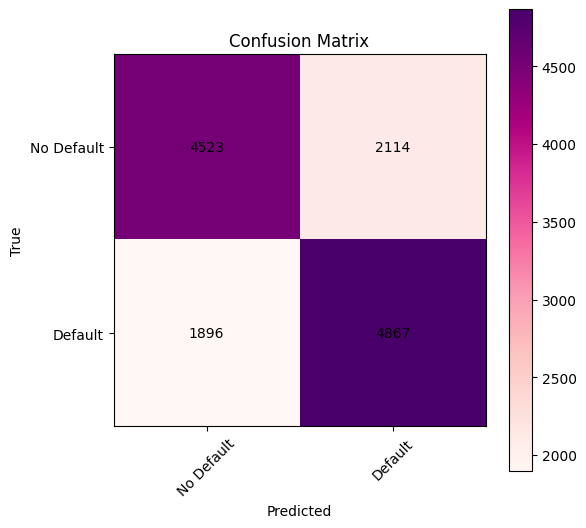

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
mat = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix:\n", mat)

# Create a custom confusion matrix plot
plt.figure(figsize=(6, 6))
plt.imshow(mat, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = ['No Default', 'Default']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values within the cells
thresh = mat.max() / 2.0
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, format(mat[i, j], 'd'),
                 ha="center", va="center",
                 color="black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

Accuracy: 0.70


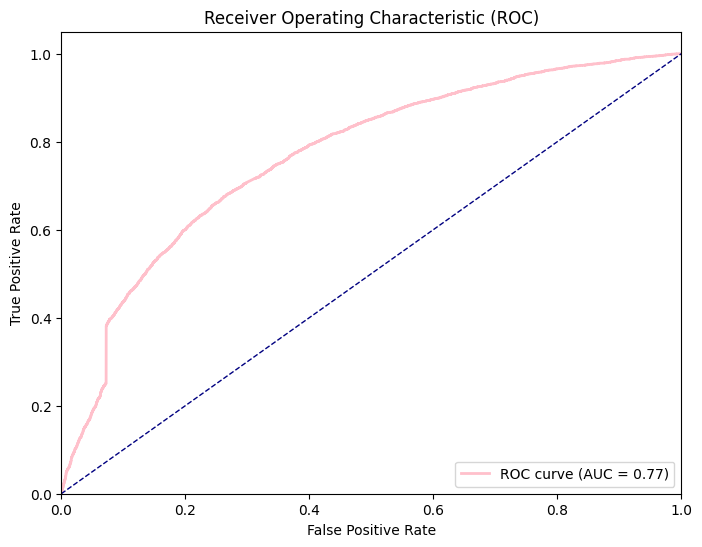

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, svm_clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

svm_report = classification_report(y_test, svm_y_pred)

print(svm_report)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      6637
           1       0.70      0.72      0.71      6763

    accuracy                           0.70     13400
   macro avg       0.70      0.70      0.70     13400
weighted avg       0.70      0.70      0.70     13400



# Best Model

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/FDA ꒰ᐢ. .ᐢ꒱₊˚⊹/Python files/Prediction Model/unknown_dataset1.csv')

In [ ]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,RECENT_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_REGISTRATION,CHILDREN_CATEGORY,AMT_REQ_CREDIT,AGE_GROUP
0,280139,Cash loans,M,Y,Y,135000.0,592560.0,31023.0,450000.0,Unaccompanied,...,7.0,0.0,7.0,0.0,1,Recent Changes (0-6 years),Intermediate Registration (9-25 years),1-2 Children,4.0,Adults
1,284067,Cash loans,M,Y,N,427500.0,450000.0,22018.5,450000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1,Intermediate Changes (7-12 years),Intermediate Registration (9-25 years),1-2 Children,1.0,Children and Young adults
2,213484,Cash loans,F,N,N,225000.0,521280.0,35262.0,450000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0,Recent Changes (0-6 years),Long-Term Registration (26+ years),No Children,0.0,Adults
3,430855,Cash loans,M,N,Y,135000.0,1215000.0,35523.0,1215000.0,Family,...,0.0,0.0,0.0,0.0,1,Recent Changes (0-6 years),Recent Registration (0-8 years),No Children,0.0,Adults
4,342521,Cash loans,M,Y,N,202500.0,355536.0,15790.5,270000.0,Unaccompanied,...,4.0,0.0,3.0,0.0,0,Recent Changes (0-6 years),Recent Registration (0-8 years),1-2 Children,5.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,378832,Cash loans,F,Y,N,81000.0,1042560.0,55674.0,900000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0,Recent Changes (0-6 years),Intermediate Registration (9-25 years),No Children,0.0,Adults
4712,302837,Revolving loans,M,N,Y,157500.0,157500.0,7875.0,157500.0,Unaccompanied,...,1.0,0.0,1.0,0.0,1,Intermediate Changes (7-12 years),Recent Registration (0-8 years),No Children,4.0,Adults
4713,313840,Cash loans,M,N,Y,337500.0,225000.0,16434.0,225000.0,Unaccompanied,...,4.0,0.0,4.0,0.0,0,Recent Changes (0-6 years),Intermediate Registration (9-25 years),No Children,1.0,Children and Young adults
4714,368211,Cash loans,F,N,Y,360000.0,1546020.0,42642.0,1350000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1,Long-Term Changes (13+ years),Intermediate Registration (9-25 years),No Children,0.0,Elderlies


In [ ]:
selected_features1 = [
    'SK_ID_CURR',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_EMPLOYED',
    'AMT_ANNUITY',
    'REGION_POPULATION_RELATIVE',
    'AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'AMT_GOODS_PRICE',
    'AMT_REQ_CREDIT',
    'ORGANIZATION_TYPE',
    'NAME_FAMILY_STATUS',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'CNT_FAM_MEMBERS',
    'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE',
    'YEARS_REGISTRATION',
    'YEARS_ID_PUBLISH',
    'NAME_TYPE_SUITE',
    'AGE_GROUP',
    'NAME_HOUSING_TYPE',
    'CODE_GENDER',
    'RECENT_PHONE_CHANGE',
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_REALTY',
    'FLAG_OWN_CAR',
    'REGION_RATING_CLIENT_W_CITY',
    'CHILDREN_CATEGORY',
    ]

In [ ]:
df_test = df_test[selected_features1]

In [ ]:
df_test.head()

,SK_ID_CURR,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
0,280139,0.478557,0.506484,677,31023.0,0.031329,592560.0,135000.0,450000.0,4.0,...,Unaccompanied,Adults,House / apartment,M,1,Cash loans,Y,Y,2,1-2 Children
1,284067,0.594791,0.113196,605,22018.5,0.035792,450000.0,427500.0,450000.0,1.0,...,Unaccompanied,Children and Young adults,House / apartment,M,1,Cash loans,N,Y,2,1-2 Children
2,213484,0.730700,0.492060,6995,35262.0,0.032561,521280.0,225000.0,450000.0,0.0,...,Unaccompanied,Adults,House / apartment,F,0,Cash loans,N,N,1,No Children
3,430855,0.399613,0.304672,4499,35523.0,0.015221,1215000.0,135000.0,1215000.0,0.0,...,Family,Adults,House / apartment,M,1,Cash loans,Y,N,2,No Children
4,342521,0.734874,0.353727,1263,15790.5,0.020713,355536.0,202500.0,270000.0,5.0,...,Unaccompanied,Adults,Rented apartment,M,0,Cash loans,N,Y,2,1-2 Children


In [ ]:
# Get a list of column names
columns_to_encode = df_test.select_dtypes(include=['object']).columns


# Iterate through the selected columns and apply the custom mapping
for col in columns_to_encode:
    unique_values = df_test[col].unique()
    value_mapping = {value: index for index, value in enumerate(unique_values)}
    df_test[col] = df_test[col].map(value_mapping)

<ipython-input-120-2a08be2f31a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = df_test[col].map(value_mapping)
<ipython-input-120-2a08be2f31a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = df_test[col].map(value_mapping)
<ipython-input-120-2a08be2f31a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_EMPLOYED',
    'REGION_POPULATION_RELATIVE',
    'AMT_ANNUITY',
    'AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'AMT_GOODS_PRICE',
    'CNT_FAM_MEMBERS',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT',
    'ORGANIZATION_TYPE'
   ]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

<ipython-input-123-497a7ce83729>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])


In [ ]:
df_test

,SK_ID_CURR,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT,...,NAME_TYPE_SUITE,AGE_GROUP,NAME_HOUSING_TYPE,CODE_GENDER,RECENT_PHONE_CHANGE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,REGION_RATING_CLIENT_W_CITY,CHILDREN_CATEGORY
0,280139,0.025625,0.214286,-0.437069,0.300791,0.814716,0.017237,-0.120488,-0.206384,0.861501,...,0,0,0,0,1,0,0,0,2,0
1,284067,0.584371,-1.834749,-0.437619,-0.368222,1.147584,-0.359755,0.950137,-0.206384,-0.494436,...,0,1,0,0,1,0,1,0,2,0
2,213484,1.237700,0.139136,-0.388839,0.615738,0.906604,-0.171259,0.208935,-0.206384,-0.946415,...,0,0,0,1,0,0,1,1,1,1
3,430855,-0.353871,-0.837158,-0.407893,0.635130,-0.386681,1.663247,-0.120488,2.013542,-0.946415,...,1,0,0,0,1,0,0,1,2,1
4,342521,1.257769,-0.581584,-0.432596,-0.830947,0.022934,-0.609560,0.126579,-0.728720,1.313480,...,0,0,1,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,378832,-1.501570,0.724133,-0.402290,2.132299,-0.177249,1.207238,-0.318142,1.099455,-0.946415,...,0,0,0,1,0,0,1,0,3,1
4712,302837,-2.164478,-0.010833,-0.428894,-1.419049,0.354907,-1.133256,-0.038132,-1.055179,0.861501,...,0,0,0,0,1,1,0,1,2,1
4713,313840,1.078587,-1.932409,-0.439237,-0.783136,1.925345,-0.954756,0.620714,-0.859303,-0.494436,...,0,1,0,0,0,0,0,1,1,1
4714,368211,0.911658,1.199695,2.345969,1.164054,-0.097295,2.538612,0.703070,2.405294,-0.946415,...,0,2,0,1,1,0,0,1,2,1


In [ ]:
df_id = pd.DataFrame (df_test['SK_ID_CURR'], columns = ['SK_ID_CURR'])

In [ ]:
X = rdf.drop('TARGET', axis=1)
y = rdf['TARGET']

In [ ]:
df_test = df_test.drop(columns = 'SK_ID_CURR')

In [ ]:
best_y_pred = rf_random.predict(df_test)

In [ ]:
df_id['TARGET'] = best_y_pred

In [ ]:
df_id

,SK_ID_CURR,TARGET
0,280139,1
1,284067,1
2,213484,0
3,430855,1
4,342521,0
...,...,...
4711,378832,0
4712,302837,1
4713,313840,1
4714,368211,0


In [ ]:
df_id.to_csv('predicted_dataset.csv', index=False)